<p style = "font-size : 50px; color : #532e1c ; font-family : 'Calibri'; text-align : center; background-color : #D3D3D3; border-radius: 5px 5px;"><strong>Deteccion de fraude en seguros de vehiculos</strong></p>

# Machine learning aplicado al fraude en seguros de vehiculos - TFM 
## Jhon Harry Loaiza

### Summary

El conjunto de datos objeto de análisis se llama  [*insurance_claims.csv*](https://www.kaggle.com/toramky/automobile-dataset), el cual se ha obtenido en Kaggle y está conformado por 40 columnas y 1000 filas, la descripcion de los campos del dataset es la siguiente:

La descripción de las variables del dataset es la siguiente:

* **months_as_customer**: tiempo en meses que el cliente ha estado como cliente de seguros de vehículos
* **age**: edad del cliente
* **policy_number**: numero de poliza de seguros de vehiculos
* **policy_bind_date**: fecha de inicio de la poliza de seguros de vehiculos
* **policy_state**: estado de la poliza de seguros de vehiculos
* **policy_csl**: clasificacion de la poliza de seguros de vehiculos
* **policy_deductable**: deducible de la poliza de seguros de vehiculos
* **policy_annual_premium**: cuota anual de la poliza de seguros de vehiculos
* **umbrella_limit**: limite de la poliza de seguros de vehiculos
* **insured_zip**: codigo postal del cliente
* **insured_sex**: genero del cliente de la poliza de seguros
* **insured_education_level**: nivel educativo del cliente asegurado
* **insured_occupation**: ocupacion del asegurado
* **insured_hobbies**: hobbies del cliente de la poliza de seguros de vehiculos
* **insured_relationship**: relacion del cliente de la poliza de seguros de vehiculos
* **capital-gains**: capital ganado del cliente de la poliza de seguros de vehiculos
* **capital-loss**: capital perdido del cliente de la poliza de seguros de vehiculos
* **incident_date**: fecha de incidente del cliente de la poliza de seguros de vehiculos
* **incident_type**: tipo de incidente del cliente de la poliza de seguros de vehiculos
* **collision_type**: tipo de colision del cliente de la poliza de seguros de vehiculos
* **incident_severity**: gravedad del incidente del cliente de la poliza de seguros de vehiculos
* **incident_state**: estado del incidente del cliente de la poliza de seguros de vehiculos 
* **incident_city**: ciudad del incidente del cliente de la poliza de seguros de vehiculos
* **incident_location**: localizacion del incidente del cliente de la poliza de seguros de vehiculos
* **incident_hour_of_the_day**: hora del dia del incidente del cliente de la poliza de seguros de vehiculos
* **number_of_vehicles_involved**:  numero de vehiculos involucrados en el incidente del cliente de la poliza de seguros de vehiculos
* **property_damage**: daño a la propiedad del cliente de la poliza de seguros de vehiculos
* **bodily_injuries**: heridos del cliente de la poliza de seguros de vehiculos
* **witnesses**: testigos del cliente de la poliza de seguros de vehiculos
* **police_report_available**: reporte de la policia del cliente de la poliza de seguros de vehiculos
* **total_claim_amount**: total de la reclamacion del cliente de la poliza de seguros de vehiculos
* **injury_claim**: reclamacion de heridos del cliente de la poliza de seguros de vehiculos
* **property_claim**: reclamacion de la propiedad del cliente de la poliza de seguros de vehiculos
* **vehicle_claim**: reclamacion del vehiculo del cliente de la poliza de seguros de vehiculos
* **auto_make**: marca del vehiculo del cliente de la poliza de seguros de vehiculos
* **auto_model**: modelo del vehiculo del cliente de la poliza de seguros de vehiculos
* **auto_year**: año del vehiculo del cliente de la poliza de seguros de vehiculos
* **fraud_reported**: reporte de fraude del cliente de la poliza de seguros de vehiculos

## 0. Cargue de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from collections import Counter
from boruta import BorutaPy

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier 
import xgboost as xgb
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score,recall_score,accuracy_score, jaccard_score, cohen_kappa_score, log_loss ,f1_score, roc_auc_score


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
%matplotlib inline

## 1. Cargue de la base de datos y descripcion del dataset

In [2]:
# cargue de datos
df = pd.read_csv(r'C:\Users\owner\Documents\Master UOC\Semestre V\TFM\Proyecto_TFM_UOC\dataset\insurance_claims.csv')
# Dimensión de los datos
print("Dimensiones del dataset:" + str(df.shape))
df.info()

Dimensiones del dataset:(1000, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null

In [3]:
for column in df:
    print(column)
    print(sorted(df[column].unique()), '\n')

months_as_customer
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 227, 228, 229, 230, 231,

In [4]:
np.min(df['auto_year'])

1995

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


## 2. Preparacion de datos

Reemplazamos los valores con '?' observados en las variables categoricas como **police_report_available**. Crearemos una funcion que permite identificar los campos que posean datos perdidos. 
Tambien existe una columna vacia de nombre **_c39** la cual puede ser descartada mediante esta funcion, al hacer un drop de las columnas que posen mas de un 60% de datos perdidos.

In [6]:
def drop_missing(df):
    """_summary_ 
    Retorna las columnas que posean 
    menos del 60% de datos perdidos

    Args:
        df (DataFrame): _description_

    Returns:
        _Dataframe con columnas con menos del 60%
        de valores perdidos
    """

    threshold = len(df) * 0.6
    df.dropna(axis=1, thresh=threshold, inplace=True)
    return df

In [7]:
# verificamos las columnas remanentes en el dataset
drop_missing(df)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


Identificamos los valores marcados como "?" usando un loop, para identificar si la columna contiene el simbolo entre sus valores

In [8]:
def quotation_values(df):
    """retorna columnas y el conteo 
        con valores '?'

    Args:
        df (_type_): argumento de entrada es
        un dataframe

    Returns:
        dataframe con los campos y la suma de records
        con '?'
    """
    
    perdidosList = {}
    for col in list(df.columns):
        if (df[col]).dtype == object:
            quotation = np.sum(df[col] == '?')
            perdidosList[col] = quotation
    perdidos = pd.DataFrame.from_dict(perdidosList, orient = 'index')
    perdidos.columns =['Count_lost']
    return (perdidos)

quotation_values(df)

,Count_lost
policy_bind_date,0
policy_state,0
policy_csl,0
insured_sex,0
insured_education_level,0
insured_occupation,0
insured_hobbies,0
insured_relationship,0
incident_date,0
incident_type,0


In [9]:
perdidos = {}
for col in list(df.columns):
    if (df[col]).dtype == object:
        quotation = np.sum(df[col] == '?')
        perdidos[col] = quotation
perdidos = pd.DataFrame.from_dict(perdidos, orient = 'index')
print(perdidos)

                           0
policy_bind_date           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_date              0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_location          0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
fraud_reported             0


Los campos con valores "?" son tres, los cuales son **collision_type**, **property_damage**, **police_report_availabe**. Procedemos a reemplazar los valores "?" por "nan" para luego optar por imputar o no los valores.

In [10]:
# reemplazamos los valores con "?" en el dataset
df.replace('?', np.nan, inplace = True)

Veamos la proporcion de datos perdidos en cada variable

In [11]:
prop_perdidos = df.isnull().sum() * 100 / len(df)
valores_perdidos_df = pd.DataFrame({'Variable': df.columns,
                                 '% de perdidos': prop_perdidos})

valores_perdidos_df

,Variable,% de perdidos
months_as_customer,months_as_customer,0.0
age,age,0.0
policy_number,policy_number,0.0
policy_bind_date,policy_bind_date,0.0
policy_state,policy_state,0.0
policy_csl,policy_csl,0.0
policy_deductable,policy_deductable,0.0
policy_annual_premium,policy_annual_premium,0.0
umbrella_limit,umbrella_limit,0.0
insured_zip,insured_zip,0.0


Procedemos a imputar los valores perdidos en las variables que poseen nulos, usando imputacion basada en la categoria mas frecuente.

In [12]:
#Seleccionamos los campos a imputar
fields_impute = df[["property_damage", 'police_report_available', 'collision_type']]

# guardamos los nombres de las columnas
col_names_impute = list(fields_impute.columns)

#extraemos el array con los valores de las variables escogidas
data = fields_impute.values
data.shape

#https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
#https://dzone.com/articles/imputing-missing-data-using-sklearn-simpleimputer#:~:text=You%20can%20use%20Sklearn.,and%20constant%20can%20be%20used

(1000, 3)

In [13]:
print(fields_impute['police_report_available'].value_counts())
print(fields_impute['collision_type'].value_counts())
print(fields_impute['property_damage'].value_counts())

NO     343
YES    314
Name: police_report_available, dtype: int64
Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
NO     338
YES    302
Name: property_damage, dtype: int64


In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(data)
data_imputed = imputer.transform(data)
data_imputed.shape

(1000, 3)

In [15]:
# creamos el dataframe con los datos imputados
data_imputed_df = pd.DataFrame(data_imputed, columns = col_names_impute)
data_imputed_df.head()

,property_damage,police_report_available,collision_type
0,YES,YES,Side Collision
1,NO,NO,Rear Collision
2,NO,NO,Rear Collision
3,NO,NO,Front Collision
4,NO,NO,Rear Collision


In [16]:
# concatenamos los datos originales con los imputados
df.drop(['property_damage', 'police_report_available', 'collision_type'], axis = 1, inplace = True)
df = pd.concat([df, data_imputed_df], axis = 1)

#Verficamos que los datos se han imputado correctamente
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
total_claim_amount             0
injury_claim                   0
property_c

In [17]:
print(df['police_report_available'].value_counts())
print(df['collision_type'].value_counts())
print(df['property_damage'].value_counts())

NO     686
YES    314
Name: police_report_available, dtype: int64
Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
NO     698
YES    302
Name: property_damage, dtype: int64


In [18]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,property_damage,police_report_available,collision_type
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,1,2,71610,6510,13020,52080,Saab,92x,2004,Y,YES,YES,Side Collision
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,0,0,5070,780,780,3510,Mercedes,E400,2007,Y,NO,NO,Rear Collision
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,2,3,34650,7700,3850,23100,Dodge,RAM,2007,N,NO,NO,Rear Collision
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,1,2,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NO,NO,Front Collision
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,0,1,6500,1300,650,4550,Accura,RSX,2009,N,NO,NO,Rear Collision


Hemos imputado los valores faltantes de manera satisfactoria.

## 3. Outliers en la data 

Seleccionamos los campos de tipo numerico y categorico y los guardamos en una variable llamada **data_outliers**

In [19]:
numeric_df = df.select_dtypes(include = ["number"])

In [20]:
#Hacemos un drop de la columna "policy_number" e insured_zip ya que es un index la primera y la segunda es una locacion.
numeric_df.drop(['policy_number', 'insured_zip'], axis=1, inplace=True)

Usar clases para construir modelos
https://towardsdatascience.com/using-classes-for-machine-learning-2ed6c0713305

Veamos la distribucion de los datos en cada variable numerica 

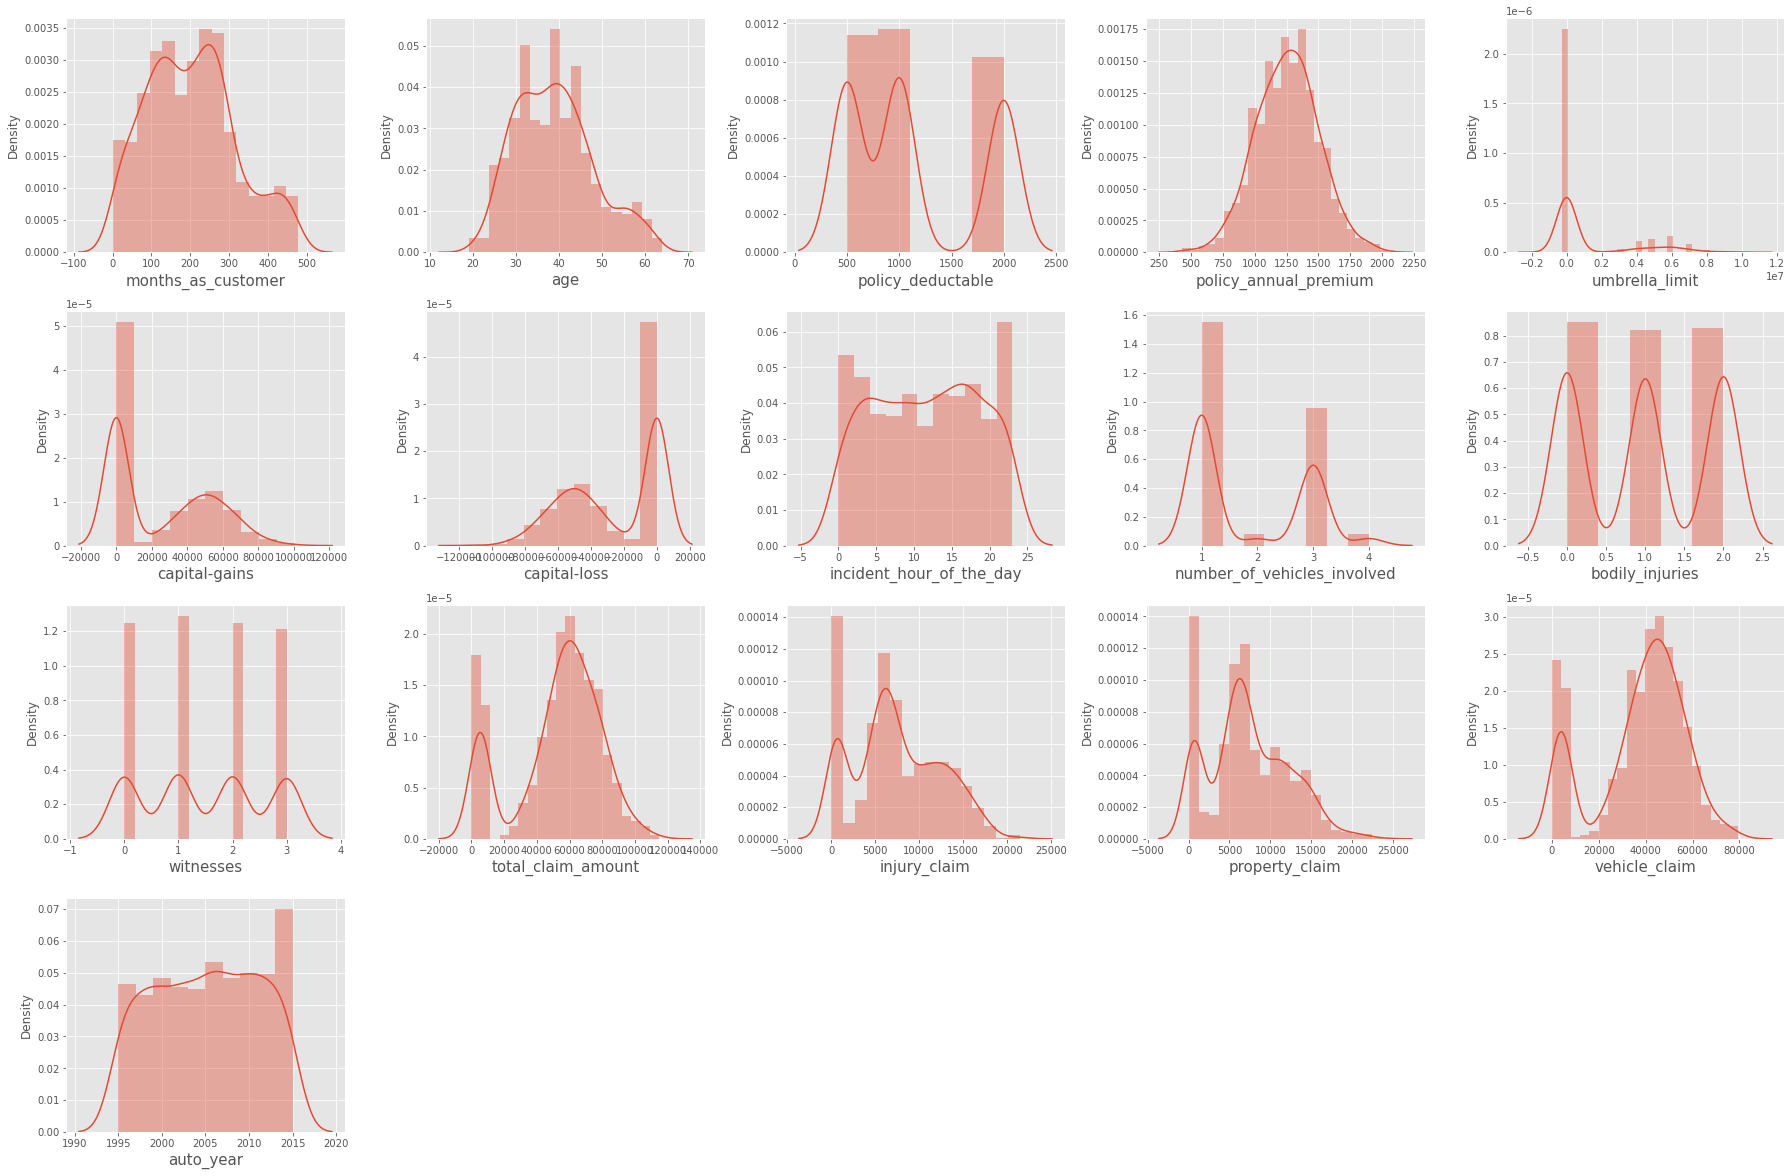

In [21]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in numeric_df.columns:
    if plotnumber <= 28:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(numeric_df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Veamos ahora los outliers en los campos numericos   

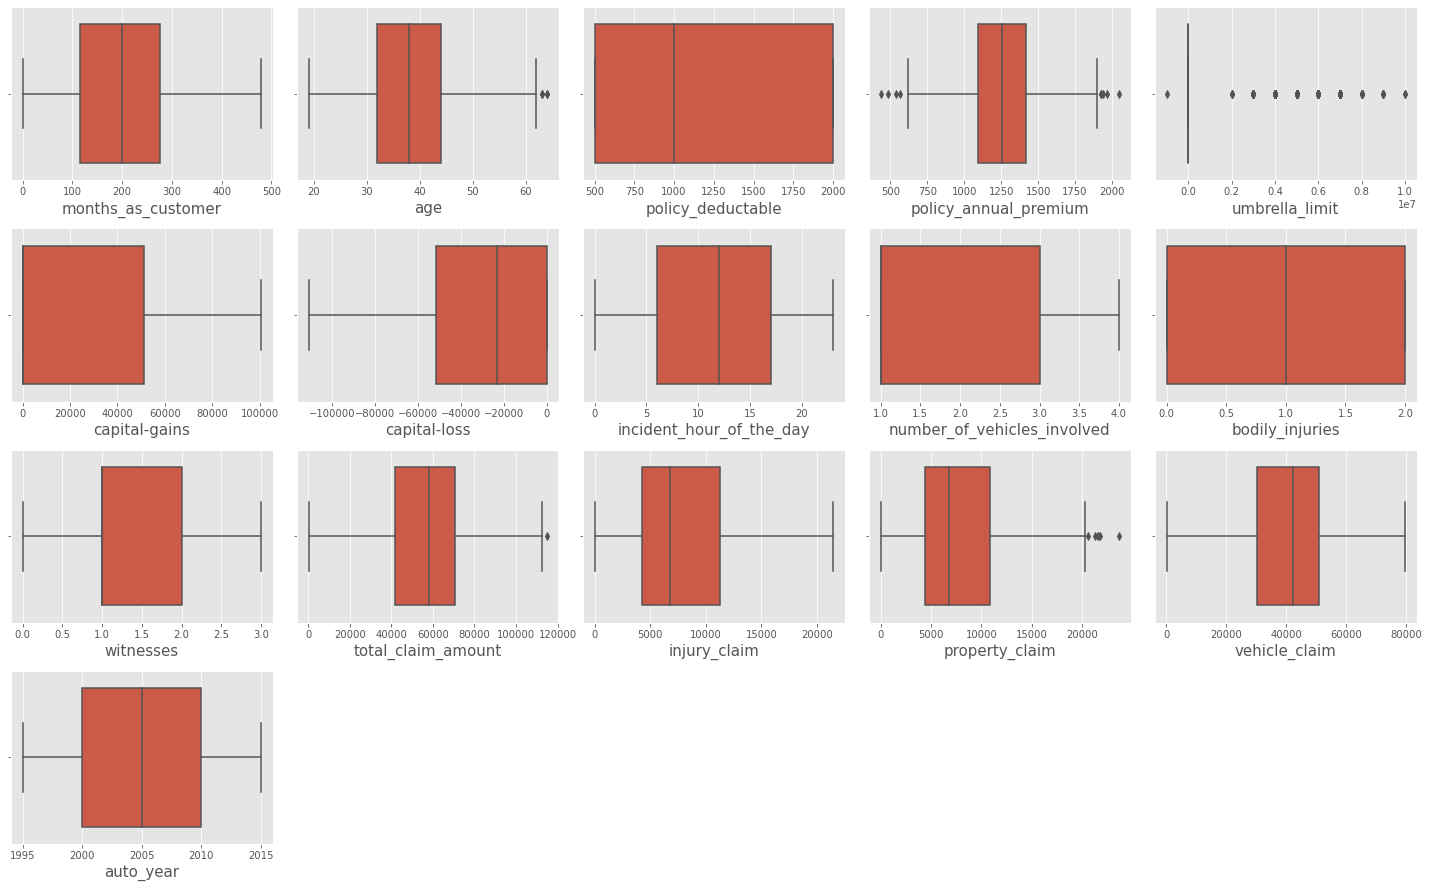

In [22]:
plt.figure(figsize = (20, 15))
plot_box = 1

for col in numeric_df.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plot_box)
        sns.boxplot(numeric_df[col])
        plt.xlabel(col, fontsize = 15)
    
    plot_box += 1
plt.tight_layout()
plt.show()

Los outliers parece que son datos que pueden ser reales en el contexto de los casos, podriamos ver la distribucion de los casos por la variable objetivo para tener mejor idea de lo que pasa. Podemos hacer un escalamiento de las variables numricas luego, antes de realizar la modelacion.

## 4. Visualizacion datos


### 4.1 Analisis Exploratorio de datos

In [23]:
Baseline=pd.DataFrame({'Count':df.groupby(['fraud_reported']).size()})
Baseline=Baseline.reset_index()
Baseline['Prop']=Baseline['Count']/Baseline['Count'].sum()

In [24]:
Baseline

,fraud_reported,Count,Prop
0,N,753,0.753
1,Y,247,0.247


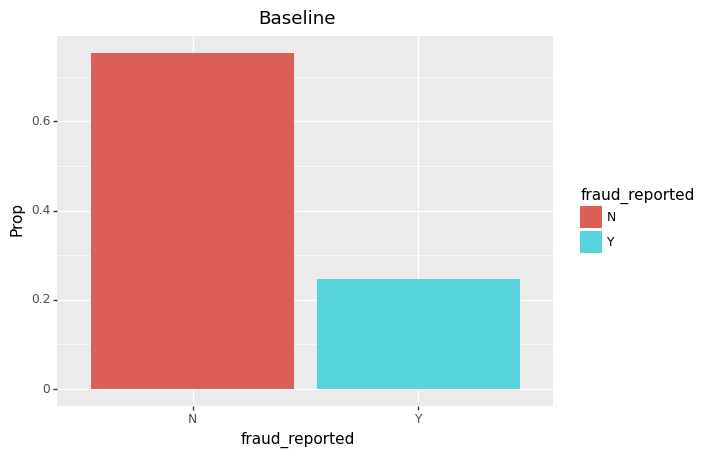

<ggplot: (161304133940)>

In [25]:
(ggplot(Baseline, aes(x='fraud_reported',y='Prop',fill='fraud_reported'))+geom_col()+ggtitle('Baseline'))

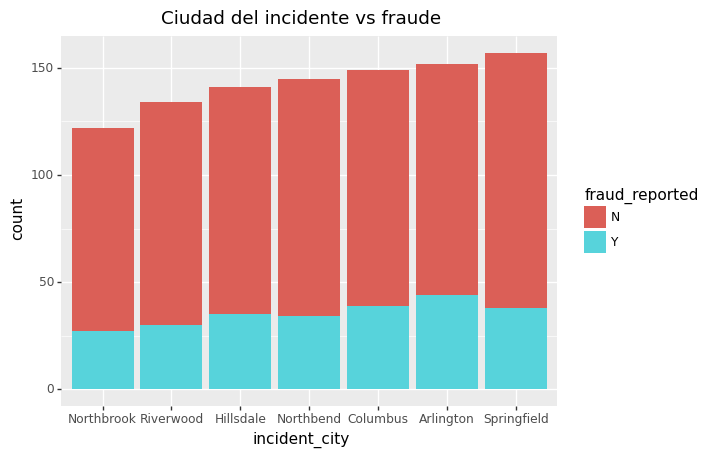

<ggplot: (161304195524)>

In [26]:
# creamos una lista con las ciudades ordenadas de mayor a menor en la cantidad o conteo
city = df['incident_city'].value_counts().index.to_list()[::-1]

ggplot(df) + geom_bar(aes(x='incident_city', fill='fraud_reported'))+\
scale_x_discrete(limits=city)+\
    ggtitle('Ciudad del incidente vs fraude')

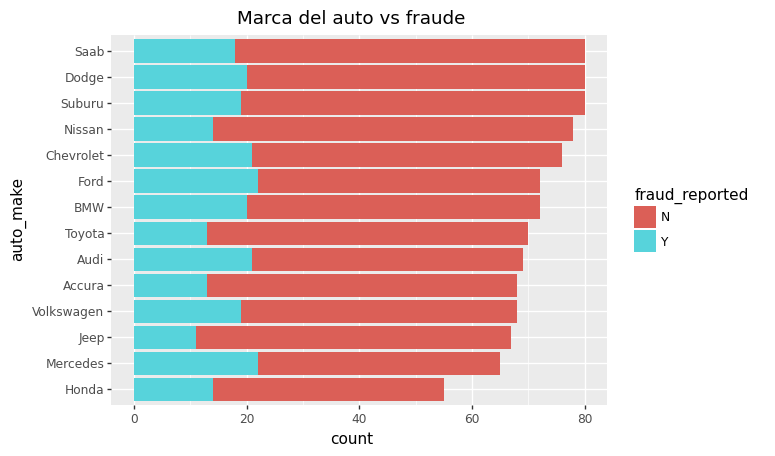

<ggplot: (161304239092)>

In [27]:
# creamos la lista ordenada de las marcas
make = df.auto_make.value_counts().index.to_list()[::-1]

ggplot(df) + geom_bar(aes(x='auto_make', fill='fraud_reported'))+\
coord_flip() + scale_x_discrete(limits=make)+\
     ggtitle('Marca del auto vs fraude')

Se observa una mayor cantidad de autos de la marca Mercedes Benz envueltos en reclamaciones fraudulentas. Los Nissan parecen tener la menor propocion de casos fraudulentos dentro de su grupo.

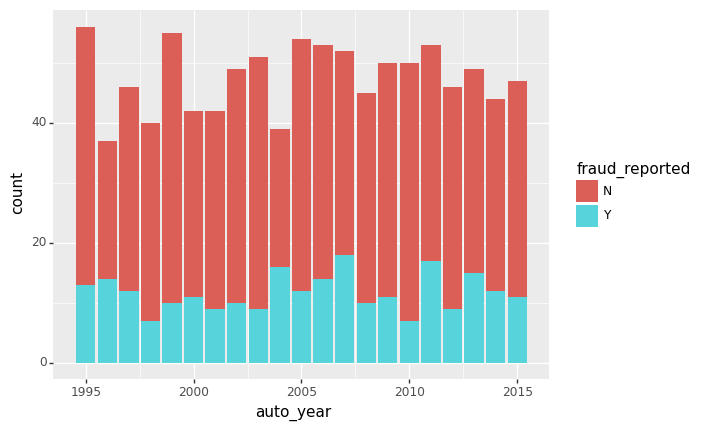

<ggplot: (161304195563)>

In [28]:
ggplot(df) + geom_bar(aes(x='auto_year', fill='fraud_reported'))

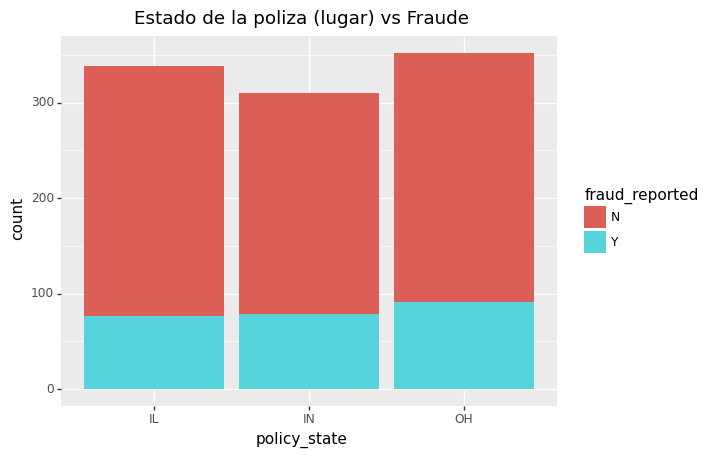

<ggplot: (161304194329)>

In [29]:
ggplot(df) + geom_bar(aes(x='policy_state', fill='fraud_reported'))+ggtitle('Estado de la poliza (lugar) vs Fraude')

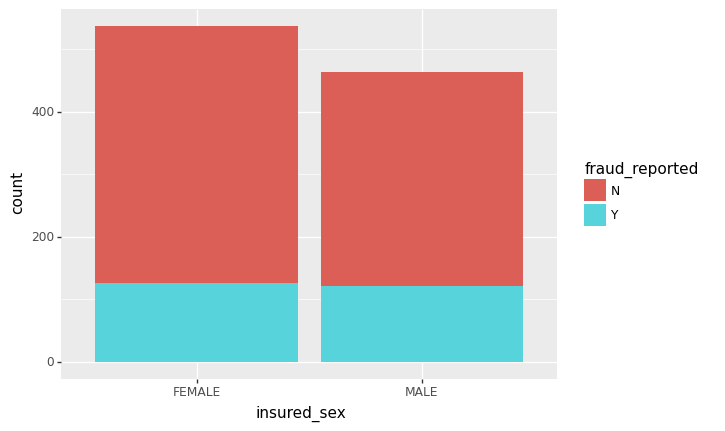

<ggplot: (161304444585)>

In [30]:
ggplot(df) + geom_bar(aes(x='insured_sex', fill='fraud_reported'))

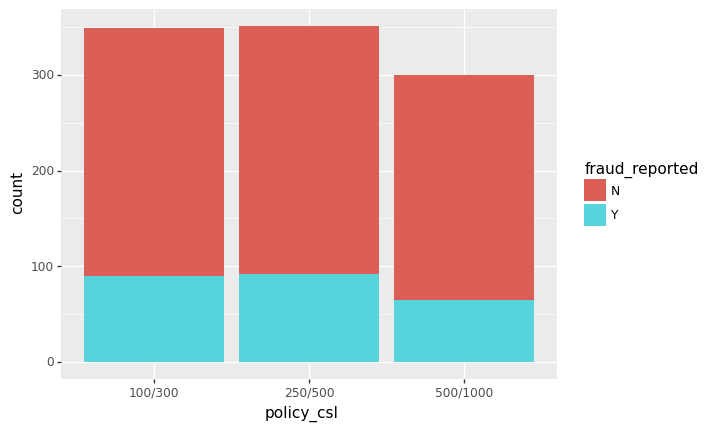

<ggplot: (161302838459)>

In [31]:
ggplot(df) + geom_bar(aes(x='policy_csl', fill='fraud_reported'))

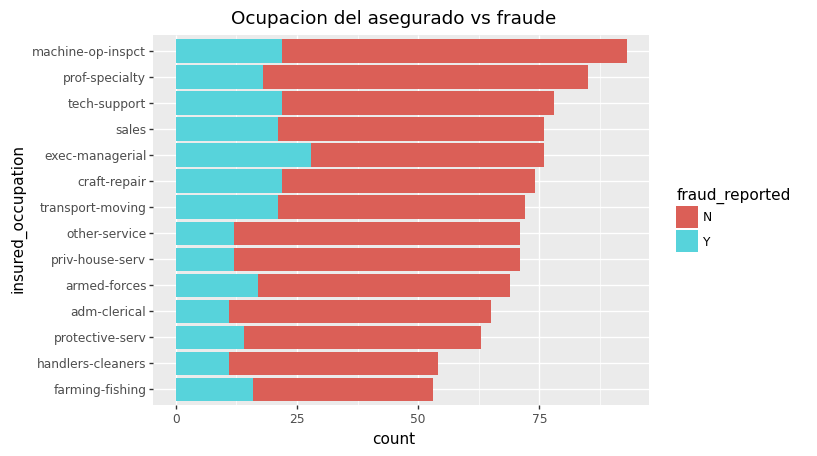

<ggplot: (161304412932)>

In [32]:
# creamos una lista con las ocupaciones ordenadas de mayor a menor en la cantidad o conteo
occupation = df['insured_occupation'].value_counts().index.to_list()[::-1]

# se usa coord_flip para cambiar a horizontal el grafico
ggplot(df) + geom_bar(aes(x='insured_occupation', fill='fraud_reported'))+\
coord_flip() + scale_x_discrete(limits=occupation)+\
     ggtitle('Ocupacion del asegurado vs fraude')

In [33]:
#por mes de aprobación
#parece que las personas que obtuvieron prestamos de abril a mayo, o las que lo hicieorn en noviembre, no pagan sus obligaciones
def highlight(val):
  return ['background-color: red' if a>0.7 else '' for a in val] 

occupation=pd.crosstab(df.insured_occupation, df.fraud_reported ,normalize="index").transpose()
occupation.style.apply(highlight)

insured_occupation,adm-clerical,armed-forces,craft-repair,exec-managerial,farming-fishing,handlers-cleaners,machine-op-inspct,other-service,priv-house-serv,prof-specialty,protective-serv,sales,tech-support,transport-moving
fraud_reported,,,,,,,,,,,,,,
N,0.830769,0.753623,0.702703,0.631579,0.698113,0.796296,0.763441,0.830986,0.830986,0.788235,0.777778,0.723684,0.717949,0.708333
Y,0.169231,0.246377,0.297297,0.368421,0.301887,0.203704,0.236559,0.169014,0.169014,0.211765,0.222222,0.276316,0.282051,0.291667


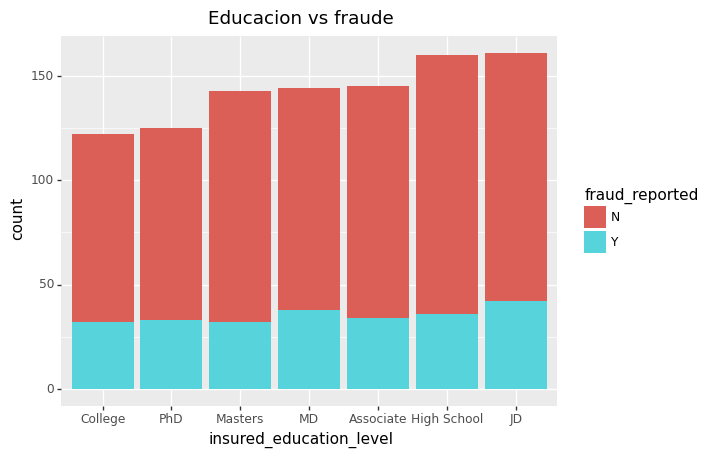

<ggplot: (161303503472)>

In [34]:
education = df['insured_education_level'].value_counts().index.to_list()[::-1]
ggplot(df) + geom_bar(aes(x='insured_education_level', fill='fraud_reported')) +\
     scale_x_discrete(limits=education)+\
     ggtitle('Educacion vs fraude')

Las personas de menor nivel educativo son mas propensas a realizar fraude en las reclamaciones. por el contrario, a mayor nivel educativo, menor es la probabilidad de realizar fraude.

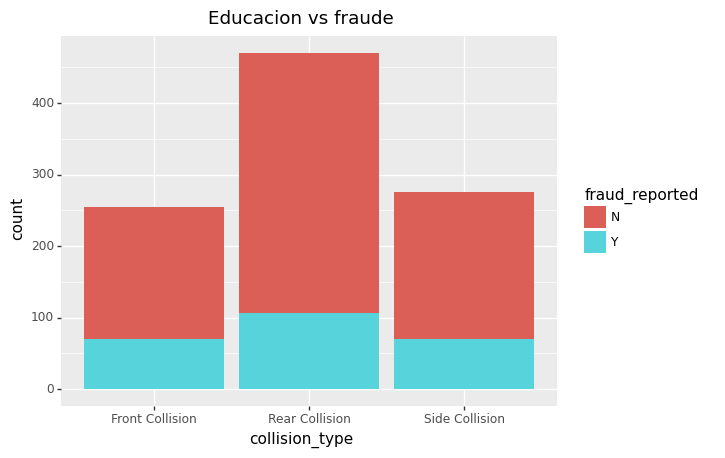

<ggplot: (161303471074)>

In [35]:
ggplot(df) + geom_bar(aes(x='collision_type', fill='fraud_reported')) +\
          ggtitle('Educacion vs fraude')

### Visualizacion de los campos numericos

### 4.2 Correlacion de los datos

Observemos ahora como esta la correlacion entre las variables numericas del dataset

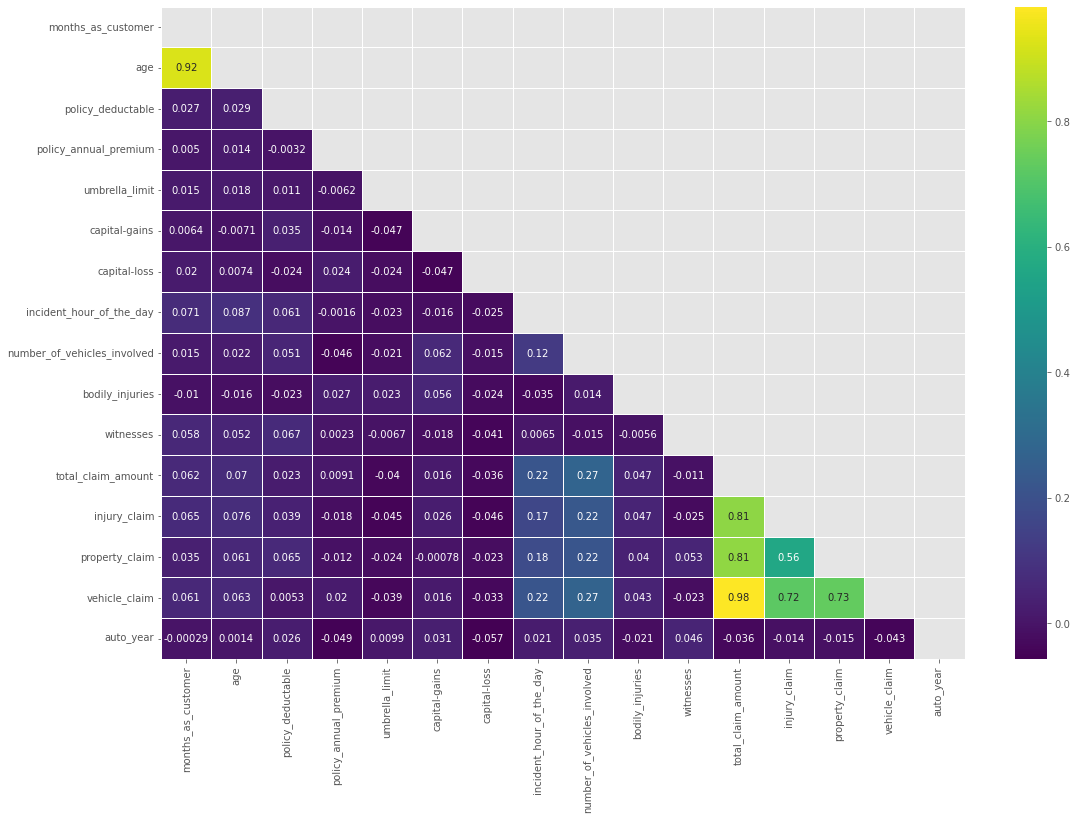

In [36]:
plt.figure(figsize = (18, 12))

corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, cmap="viridis", mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

Se puede descartar las variables que tengan poca correlacion con la variable y estas variables pueden ser eliminadas de la data.
Notese que el comportamiento de las variables categoricas es diferente.

Por ejemplo **age** del cliente se correlaciona fuertemente con la variable **months_as_customer**, podemos descartar age. sucede lo mismo con las variables **total_claim_amount**, que se relaciona fuertemente con las variables **injury_claim**, **property_claim** y **vehicle_claim** asi que esta primera podria descartarse en la data.

In [37]:
# create a function to detect variables with correlation superior to 0.8
def correl_drop(df, umbral):
    correlation = df.corr().abs()
    upper_matrix = correlation.where(np.triu(np.ones(correlation.shape), k = 1).astype(np.bool))
    drop_cols = [column for column in upper_matrix.columns if any(upper_matrix[column] > umbral)]
    return drop_cols

correl_drop(numeric_df, 0.5)

['age', 'injury_claim', 'property_claim', 'vehicle_claim']

En este caso, descartaremos las variables **Age** y **Total Claim Amount**, pero esto lo haremos mas adelante.

Veamos algunos graficos para evidenciar el comportamiento de las variables vs la variable objetivo.

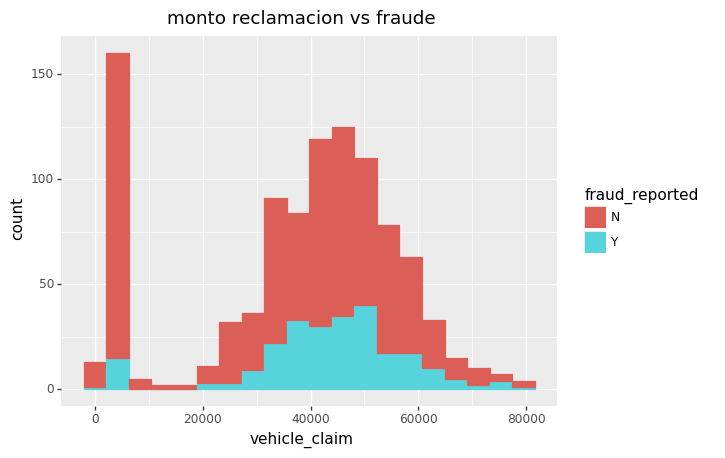

<ggplot: (161303472165)>

In [38]:
ggplot(aes(x=df.vehicle_claim,color=df.fraud_reported,fill = df.fraud_reported))+geom_histogram()+ggtitle('monto reclamacion vs fraude')


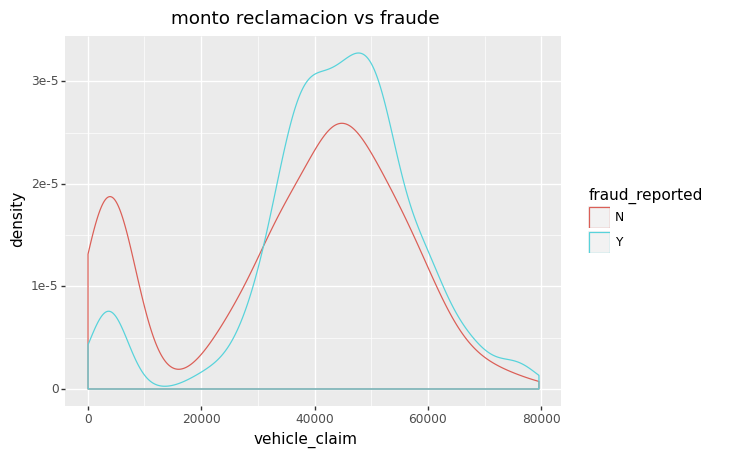

<ggplot: (161303387883)>

In [39]:
ggplot(aes(x=df.vehicle_claim,color=df.fraud_reported))+geom_density()+ggtitle('monto reclamacion vs fraude')

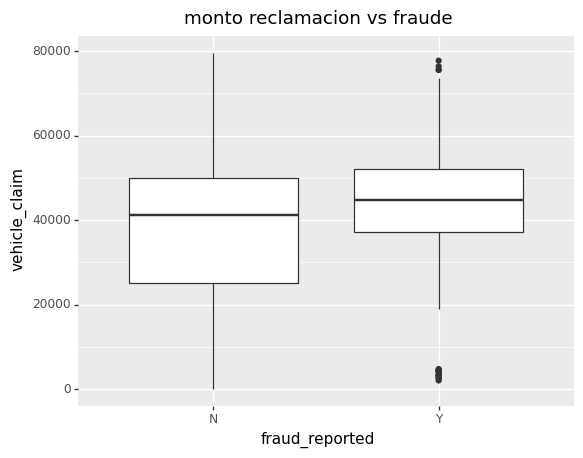

<ggplot: (161303531981)>

In [40]:
ggplot(aes(y=df.vehicle_claim,x=df.fraud_reported))+geom_boxplot()+ggtitle('monto reclamacion vs fraude')

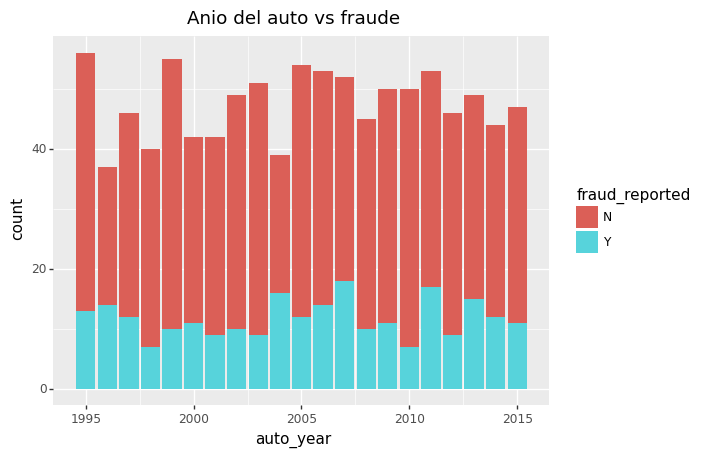

<ggplot: (161304399785)>

In [41]:
ggplot(df) + geom_bar(aes(x='auto_year', fill='fraud_reported'))+ggtitle('Anio del auto vs fraude')

In [42]:
np.min(df.policy_bind_date)
np.max(df.policy_bind_date)

'2015-02-22'

In [43]:
date_policy = pd.crosstab(df.policy_bind_date, df.fraud_reported)
date_policy.head()

fraud_reported,N,Y
policy_bind_date,,
1990-01-08,1,0
1990-01-27,0,1
1990-02-01,1,0
1990-02-03,1,0
1990-02-08,1,0


El campo **policy bind date** no muestra una relacion importante con la variable objetivo 

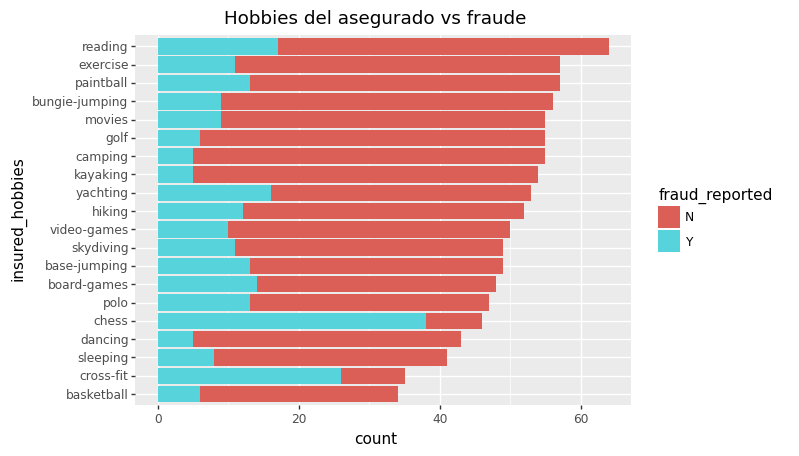

<ggplot: (161304391247)>

In [44]:
hobbies = df['insured_hobbies'].value_counts().index.tolist()[::-1]
ggplot(df) + geom_bar(aes(x='insured_hobbies', fill='fraud_reported'))+\
    coord_flip()+ scale_x_discrete(limits=hobbies)+\
    ggtitle('Hobbies del asegurado vs fraude')

Las personas que juegan *ajedrez* o realizan *crossfit* en sus **hobbies**, estan mas propensas a cometer fraude, por lo que es interesante este campo en la prediccion de los casos de fraude.

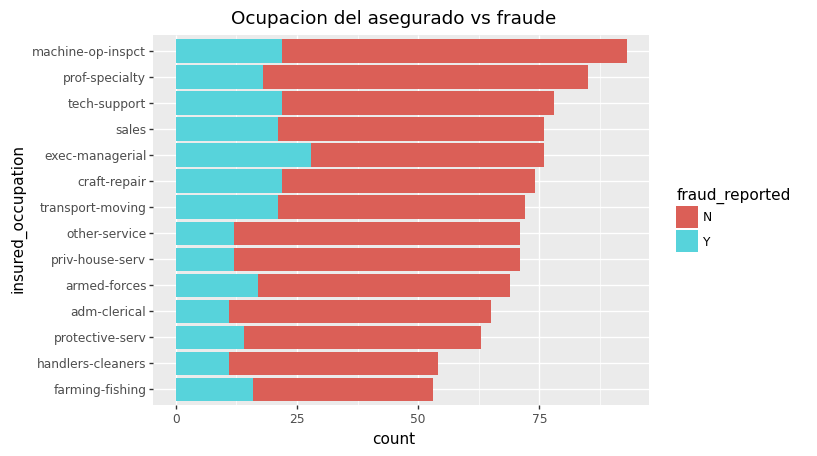

<ggplot: (161304825098)>

In [45]:
# ordeanmos los datos por la frecuencia de las categorias de ocupacion
ocupation = df['insured_occupation'].value_counts().index.tolist()[::-1]
# generamos el grafico
ggplot(df) + geom_bar(aes(x='insured_occupation', fill='fraud_reported'))+\
    coord_flip()+scale_x_discrete(limits=ocupation) +\
        ggtitle('Ocupacion del asegurado vs fraude')

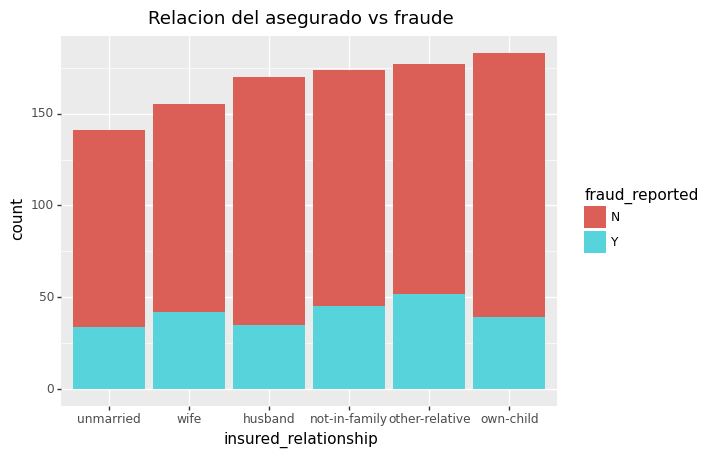

<ggplot: (161307203325)>

In [46]:
relation = df['insured_relationship'].value_counts().index.tolist()[::-1]
# generamos el grafico
ggplot(df) + geom_bar(aes(x='insured_relationship', fill='fraud_reported'))+\
    scale_x_discrete(limits=relation) +\
        ggtitle('Relacion del asegurado vs fraude')

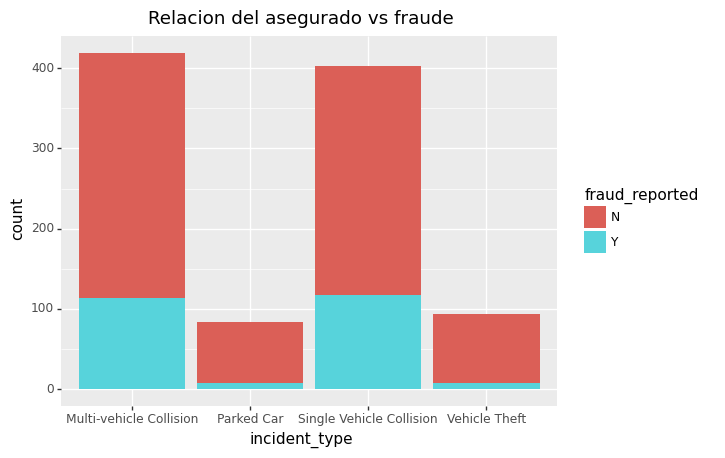

<ggplot: (161304541206)>

In [47]:
#relation = df['insured_relationship'].value_counts().index.tolist()[::-1]
# generamos el grafico
ggplot(df) + geom_bar(aes(x='incident_type', fill='fraud_reported'))+\
           ggtitle('Relacion del asegurado vs fraude')

## 4. Preprocesamiento de datos

### 4.1 Creacion de nuevas features

Empezaremos con crear un campo que indica la cantidad de anios que el vehiculo posee, usando la columna del anio en que se manufacturo el vehiculo **(auto_year)** esto nos servira para identificar si la antiguedad del modelo del vehiculo posee alguna relacion con el fraude o no.

In [48]:
anio_actual = pd.datetime.now().year # obtenemos el anio actual
df['age_vehicle'] = anio_actual - df['auto_year'] # calculamos la edad del vehiculo

df['age_vehicle'].head(10)

0    18
1    15
2    15
3     8
4    13
5    19
6    10
7     7
8    10
9    26
Name: age_vehicle, dtype: int64

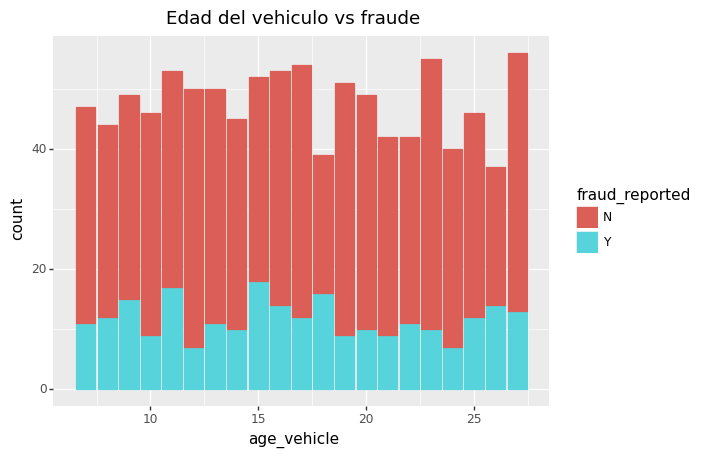

<ggplot: (161307479426)>

In [49]:
ggplot(aes(x=df.age_vehicle,color=df.fraud_reported, fill = df.fraud_reported))+geom_bar()+ggtitle('Edad del vehiculo vs fraude')

Veamos las proporciones para cada anio del vehiculo

In [50]:
def highlight(val):
  return ['background-color: red' if a>0.7 else '' for a in val] 

# Crosstab por anio del vehiculo
ct=pd.crosstab(df.age_vehicle,df.fraud_reported,normalize="index").transpose()
ct.style.apply(highlight)

age_vehicle,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
fraud_reported,,,,,,,,,,,,,,,,,,,,,
N,0.765957,0.727273,0.693878,0.804348,0.679245,0.860000,0.780000,0.777778,0.653846,0.735849,0.777778,0.589744,0.823529,0.795918,0.785714,0.738095,0.818182,0.825000,0.739130,0.621622,0.767857
Y,0.234043,0.272727,0.306122,0.195652,0.320755,0.140000,0.220000,0.222222,0.346154,0.264151,0.222222,0.410256,0.176471,0.204082,0.214286,0.261905,0.181818,0.175000,0.260870,0.378378,0.232143


Ahora vamos a hacer un split en el campo de policy_csl, ya que en la teoria este es el monto de cobertura d ela poliza por danos a persona y danos a vehiculo respectivamente.

In [51]:
df['csl_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_accident'] = df.policy_csl.str.split('/', expand=True)[1]
df[['policy_csl', 'csl_person', 'csl_accident']].head()

,policy_csl,csl_person,csl_accident
0,250/500,250,500
1,250/500,250,500
2,100/300,100,300
3,250/500,250,500
4,500/1000,500,1000


Ahora convertimos el campo de hora de ocurrencia del accidente y lo categorizamos dependiendo la hora del dia. podemos dividir el dia de 24 hrs en intervalos de 3 horas, dando como resutado 8 grupos de horas.

In [52]:
# Creamos los intervalos en grupos de 3 hrs
intervalos = [-1, 3, 6, 9, 12, 16, 20, 24]  
# asignamos los nombres a los intervalos de tiempo
cat = ["medianoche", "manana_temprano", "manana", 'mediodia', 'tarde', 'noche_temprano', 'noche']
df['incidente_periodo_dia'] = pd.cut(df.incident_hour_of_the_day, intervalos, labels=cat).astype(object)
df[['incident_hour_of_the_day', 'incidente_periodo_dia']].head(20)

,incident_hour_of_the_day,incidente_periodo_dia
0,5,manana_temprano
1,8,manana
2,7,manana
3,5,manana_temprano
4,20,noche_temprano
5,19,noche_temprano
6,0,medianoche
7,23,noche
8,21,noche
9,14,tarde


Veamos graficamente como se distribuyen los casos por periodo del dia de ocurrencia del accidente. Parece haber maor cantidad de casos en la tarde fraudulentos mientras que en la manana son menos frecuentes.

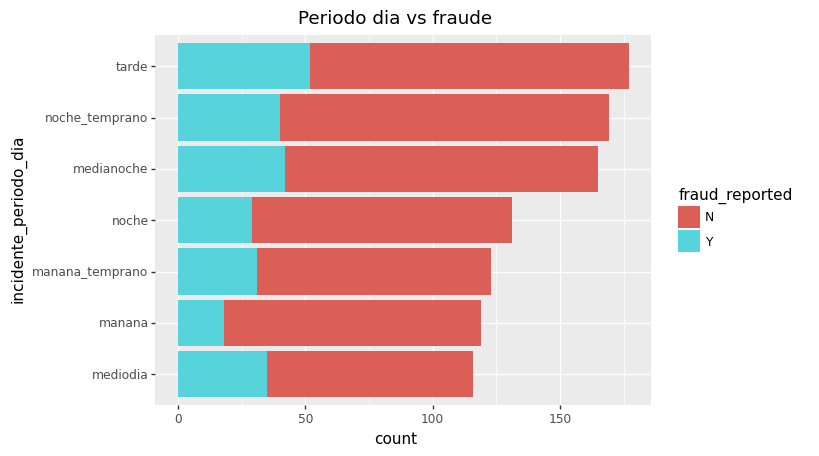

<ggplot: (161303591930)>

In [53]:
incidente_hora = df.incidente_periodo_dia.value_counts().index.tolist()[::-1]

# generamos el grafico
ggplot(df) + geom_bar(aes(x='incidente_periodo_dia', fill='fraud_reported'))+\
    coord_flip()+scale_x_discrete(limits=incidente_hora) +\
        ggtitle('Periodo dia vs fraude')

In [54]:
# Crosstab por incidente_periodo_dia del vehiculo
ct1=pd.crosstab(df.incidente_periodo_dia,df.fraud_reported,normalize="index").transpose()
ct1.style.apply(highlight)

incidente_periodo_dia,manana,manana_temprano,medianoche,mediodia,noche,noche_temprano,tarde
fraud_reported,,,,,,,
N,0.848739,0.747967,0.745455,0.698276,0.778626,0.763314,0.706215
Y,0.151261,0.252033,0.254545,0.301724,0.221374,0.236686,0.293785


El campo **umbrella_limit** posee un valor negativo que no es correcto segun el contexto de la variable, se reemplaza por un valor 0.

In [55]:
df['umbrella_limit']=df['umbrella_limit'].replace(-1000000,0)

Hacemos un drop de las columnas que no se utilizaran mas en la data. Se incluyen las columnas con alta correlacion como age, total_claim_amount, ademas de las columnas de fechas y de localizacion de incidente ya qe tienen muchas categorias que no se pueden agrupar con facilidad.

In [56]:
# Drop de columnas:

df = df.drop(columns = [
    'policy_csl',
    'insured_zip',
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    'auto_year', 
    'policy_number',
    'total_claim_amount',
    'age',
    'incident_hour_of_the_day'])

In [57]:
df.head()

,months_as_customer,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,property_damage,police_report_available,collision_type,age_vehicle,csl_person,csl_accident,incidente_periodo_dia
0,328,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Major Damage,Police,SC,Columbus,1,1,2,6510,13020,52080,Saab,92x,Y,YES,YES,Side Collision,18,250,500,manana_temprano
1,228,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Minor Damage,Police,VA,Riverwood,1,0,0,780,780,3510,Mercedes,E400,Y,NO,NO,Rear Collision,15,250,500,manana
2,134,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Minor Damage,Police,NY,Columbus,3,2,3,7700,3850,23100,Dodge,RAM,N,NO,NO,Rear Collision,15,100,300,manana
3,256,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Major Damage,Police,OH,Arlington,1,1,2,6340,6340,50720,Chevrolet,Tahoe,Y,NO,NO,Front Collision,8,250,500,manana_temprano
4,228,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Minor Damage,None,NY,Arlington,1,0,1,1300,650,4550,Accura,RSX,N,NO,NO,Rear Collision,13,500,1000,noche_temprano


## 5. Creacion datasets de train y test

Realizamos un split de los datos, las variables independientes y las variables dependientes, ademas convertimos la variable dependiente **fraud_reported** en binaria

In [58]:
# variables independientes:
X = df.drop(['fraud_reported'], axis=1)
# variable dependiente y la binarizamos usando el metod where de numpy
y = np.where(df['fraud_reported'] == 'Y', 1, 0)

### 5.2 One-Hot Encoding en las variables categoricas

Creamos el dataset de variables categoricas y lo guardamos en una variable llamada **categorical_df**, para luego aplicarle la funcion **get_dummies**

In [59]:
categorical_df = X.select_dtypes(include = ["object"])

# creamos las variables dummy
categorical_df_dummy = pd.get_dummies(categorical_df, drop_first=True)
#categorical_df_dummy = pd.get_dummies(categorical_df)
categorical_df_dummy.shape

(1000, 133)

In [60]:
categorical_df_dummy.head()

,policy_state_IN,policy_state_OH,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,property_damage_YES,police_report_available_YES,collision_type_Rear Collision,collision_type_Side Collision,csl_person_250,csl_person_500,csl_accident_300,csl_accident_500,incidente_periodo_dia_manana_temprano,incidente_periodo_dia_medianoche,incidente_periodo_dia_mediodia,incidente_periodo_dia_noche,incidente_periodo_dia_noche_temprano,incidente_periodo_dia_tarde
0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0

Agrupamos las variables para crear nuevamente el dataset completo

In [61]:
X1 = categorical_df_dummy.join(X.select_dtypes(include = ['number']))
names_cols = X1.columns.tolist() # Guardamos los nombres de las columnas para luego aplicar algoritmo boruta
X1.head()
print(X1.shape)

(1000, 146)


https://www.youtube.com/watch?v=uFDdzTjn190 rainplots

https://towardsdatascience.com/simple-example-using-boruta-feature-selection-in-python-8b96925d5d7a
https://towardsdatascience.com/cleaner-data-analysis-with-pandas-using-pipes-4d73770fbf3c
https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b

### 5.3 Feaure selection

#### Boruta Algorithm

Vamos a utilizar el algorimto Boruta para la seleccion de las variables, en este caso lo aplicamos utilizando la libreria **Borutapy**

In [62]:
# TEST  Boruta algorithm
# fit the random forest model

#forest = RandomForestClassifier(n_estimators=100, random_state=0)

# convert df to numpy array
X = X1.copy().values

# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [63]:
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=1, random_state=1)

# find all relevant features
feat_selector.fit(X, y)

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100


BorutaPy finished running.

Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	139


In [64]:
# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(names_cols, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: policy_state_IN           Rank: 34,  Keep: False
Feature: policy_state_OH           Rank: 48,  Keep: False
Feature: insured_sex_MALE          Rank: 55,  Keep: False
Feature: insured_education_level_College Rank: 102,  Keep: False
Feature: insured_education_level_High School Rank: 43,  Keep: False
Feature: insured_education_level_JD Rank: 72,  Keep: False
Feature: insured_education_level_MD Rank: 58,  Keep: False
Feature: insured_education_level_Masters Rank: 64,  Keep: False
Feature: insured_education_level_PhD Rank: 68,  Keep: False
Feature: insured_occupation_armed-forces Rank: 79,  Keep: False
Feature: insured_occupation_craft-repair Rank: 37,  Keep: False
Feature: insured_occupation_exec-managerial Rank: 16,  Keep: False
Feature: insured_occupation_farming-fishing Rank: 100,  Keep: False
Feature: insured_occupation_handlers-cleaners Rank: 89,  Keep: False
Feature: insured_occupation_machine-op-inspct Rank: 45,  Keep: False
Feature: insured_occupation_other-service Rank: 46

## 5. Balanceo de datos 

La variable objetivo es la variable **fraud_reported**, la cual tiene una distribucion de valores de 1 a 0, donde 1 es fraude y 0 No hay fraude. Usaremos el algoritmo ADASYN para balancear los datos.

* https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
* https://medium.com/geekculture/insurance-claims-fraud-detection-using-machine-learning-78f04913097
* https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/4954928053318020/1058911316420443/167703932442645/latest.html
* https://towardsdatascience.com/cleaner-data-analysis-with-pandas-using-pipes-4d73770fbf3c

In [65]:
smote = SMOTE(random_state=42)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X,  # matriz con las variables predictivas
    y, # array con los valores de la variable objetivo
    test_size=0.2,  # proporción a dejar en el test set
    random_state=123, # para controlar la semilla aleatoria
    stratify=y) # indica la variable de estratificación estratificación de la muestra

In [67]:
# summarize class distribution original Y and Y_train
counter = Counter(y)
counter_ytrain = Counter(y_train)
print(counter)
print(counter_ytrain)

Counter({0: 753, 1: 247})
Counter({0: 602, 1: 198})


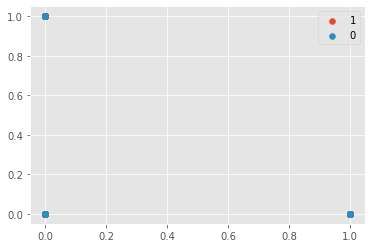

In [68]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [69]:
### este es el original

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
'''
rus = RandomOverSampler(random_state=4,sampling_strategy=1)
X_train_r, y_train_r = rus.fit_resample(X_train,y_train)
###la data es devuelta en forma secuencial: una clase tras otra, por lo que debemos aleatorizarla
data_r=pd.DataFrame(np.column_stack([X_train_r,y_train_r])).sample(frac=1).values
print("Valores balanceados : ", Counter(data_r[:,-1]));

nrow,ncol=data_r.shape
X_train_r=data_r[:,0:(ncol-1)]
y_train_r=data_r[:,-1]
y_train=y_train_r
'''

'\nrus = RandomOverSampler(random_state=4,sampling_strategy=1)\nX_train_r, y_train_r = rus.fit_resample(X_train,y_train)\n###la data es devuelta en forma secuencial: una clase tras otra, por lo que debemos aleatorizarla\ndata_r=pd.DataFrame(np.column_stack([X_train_r,y_train_r])).sample(frac=1).values\nprint("Valores balanceados : ", Counter(data_r[:,-1]));\n\nnrow,ncol=data_r.shape\nX_train_r=data_r[:,0:(ncol-1)]\ny_train_r=data_r[:,-1]\ny_train=y_train_r\n'

In [70]:
#print(X_train_r.shape)
#print(y_train.shape)

In [71]:
#### Otra implementacion usando SMOTE

#sm = SMOTE(random_state=4, sampling_strategy=0.5)
sm = SMOTE(random_state=4, sampling_strategy=1)

X_train_r, y_train_r = sm.fit_resample(X_train,y_train)
###la data es devuelta en forma secuencial: una clase tras otra, por lo que debemos aleatorizarla
#data_r=pd.DataFrame(np.column_stack([X_train_r,y_train_r])).sample(frac=1).values
#print("Valores balanceados : ", Counter(data_r[:,-1]));

counter = Counter(y_train_r)
print(counter)

#nrow,ncol=data_r.shape
#X_train_r=data_r[:,0:(ncol-1)]
#y_train_r=data_r[:,-1]
#y_train=y_train_r

y_train = y_train_r

Counter({0: 602, 1: 602})


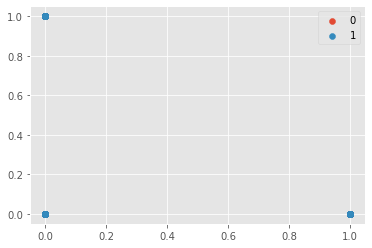

In [72]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [73]:
# vemos las formas de los conjuntos de datos
print(X_train.shape)
print(y_train.shape)

print(X_train_r.shape)
print(X_test.shape)

print(y_train_r.shape)
print(y_test.shape)

(800, 146)
(1204,)
(1204, 146)
(200, 146)
(1204,)
(200,)


OTRO EJEMPLO DE RESAMPLING CON SMOTE

In [74]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 753, 1: 247})


In [75]:
# transform the dataset
#oversample = SMOTE(random_state=4, sampling_strategy=0.6)
oversample = SMOTE(random_state=4, sampling_strategy=1)
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({1: 753, 0: 753})


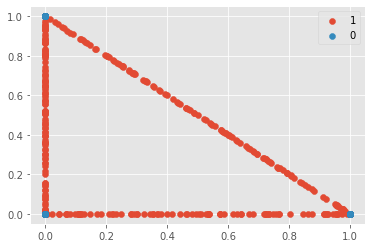

In [76]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

# Revisar Estandarizacion de Datos:

### 5.3 Estandarizacion de las variables numericas

Como se vio el los graficos de boxplot, existen campos numericos con distintos, por lo que procedemos a estandarizar los datos numericos para que sean mas uniformes.

In [77]:
# creamos el scaler
scaler = StandardScaler()
#scaler = MinMaxScaler()

# renombramos los datasets creados anteriomente
DataX_train=X_train_r
DataX_test=X_test

'''
def std_day(x):
  ##"INPUT AS A PD. DATAFRAME
  daily_data_Train=x[:,0:90].T
  scaled_features =StandardScaler()
  daily_dataSTD_Train=scaled_features.fit_transform(daily_data_Train).T
  CreateVars_Train=x[:,90:107]
  CreateVarSTD_Train=scaled_features.fit_transform(CreateVars_Train)
  datamod=np.hstack([daily_dataSTD_Train, CreateVarSTD_Train])
  return (datamod)
'''
DataX_train=scaler.fit_transform(DataX_train)
DataX_test=scaler.transform(DataX_test)

In [78]:
DataX_train.shape

(1204, 146)

Performance del clasificador

In [79]:
def metrics(real,pred):
  kappa=cohen_kappa_score(real,pred)
  acc=accuracy_score(real,pred)
  f1=f1_score(real,pred)
  prec=precision_score(real,pred)
  recall=recall_score(real,pred)
  jaccard=jaccard_score(real,pred)
  logloss=log_loss(real,pred)
  roc_score = roc_auc_score(real,pred)

  print (f" Accuracy:{acc:.4f} \n Precision: {prec:.4f} \n Recall: {recall:.4f} \n Kappa: {kappa:.4f} \n F1-Score: {f1:.4f} \n Jaccard: {jaccard:.4f} \n logloss: {logloss:.4f} \n Roc_score: {roc_score:.4f}")

BORUTA FEATURE SELECTION

In [80]:
# TEST  Boruta algorithm
# fit the random forest model

#forest = RandomForestClassifier(n_estimators=100, random_state=0)

# convert df to numpy array
X = DataX_train
y = y_train
# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state=44)
forest.fit(X, y)


# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=1, random_state=1)

# find all relevant features
feat_selector.fit(X, y)

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100
Iteration: 20 / 100
Iteration: 21 / 100
Iteration: 22 / 100
Iteration: 23 / 100
Iteration: 24 / 100
Iteration: 25 / 100
Iteration: 26 / 100
Iteration: 27 / 100
Iteration: 28 / 100
Iteration: 29 / 100
Iteration: 30 / 100
Iteration: 31 / 100
Iteration: 32 / 100
Iteration: 33 / 100
Iteration: 34 / 100
Iteration: 35 / 100
Iteration: 36 / 100
Iteration: 37 / 100
Iteration: 38 / 100
Iteration: 39 / 100
Iteration: 40 / 100
Iteration: 41 / 100
Iteration: 42 / 100
Iteration: 43 / 100
Iteration: 44 / 100
Iteration: 45 / 100
Iteration: 46 / 100
Iteration: 47 / 100
Iteration: 48 / 100
Iteration: 49 / 100
Iteration: 50 / 100
Iteration

In [81]:
# Creamos el dataset con la data

DT = DecisionTreeClassifier(min_samples_split=45, max_depth = 4)
DT_model = DT.fit(X_filtered, y_train)

X_test_filtered = feat_selector.transform(DataX_test)

prediction_DT = DT_model.predict(X_test_filtered)

accuracy =  0.85
0.8775510204081632
0.7413793103448276


<AxesSubplot:>

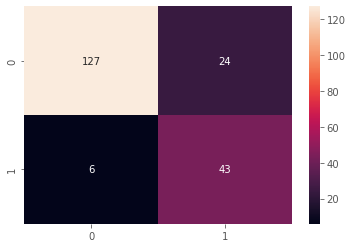

In [82]:
print("accuracy = ", accuracy_score(y_test, prediction_DT))
print(recall_score(y_test, prediction_DT))
print(f1_score(y_test, prediction_DT))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_DT)

#fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(cm, annot = True, fmt='g')


In [83]:
X_filtered.shape

(1204, 35)

### OTROS METODOS DE SELECCION:

### SelectKBest algorithm

In [84]:
'''
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Feature extraction

chi_best = SelectKBest(score_func = chi2, k = 4)
k_best = chi_best.fit(X,y)

# summarize scores
np.set_printoptions(precision=3)
print(k_best.scores_)

k_features = k_best.transform(X)
# summarize selected features

print(k_features[0:5,:])

'''

'\nfrom sklearn.feature_selection import chi2\nfrom sklearn.feature_selection import SelectKBest\n\n# Feature extraction\n\nchi_best = SelectKBest(score_func = chi2, k = 4)\nk_best = chi_best.fit(X,y)\n\n# summarize scores\nnp.set_printoptions(precision=3)\nprint(k_best.scores_)\n\nk_features = k_best.transform(X)\n# summarize selected features\n\nprint(k_features[0:5,:])\n\n'

In [85]:
from sklearn.pipeline import Pipeline

### RFE

In [86]:
from sklearn.feature_selection import RFE
model = DecisionTreeClassifier()
rfe = RFE(estimator = model, n_features_to_select = 5)
fit = rfe.fit(DataX_train, y_train)

In [87]:
print("num features: %d" % fit.n_features_)
print('Selected features: %s' % fit.support_)
print('feature ranking: %s' % fit.ranking_)

num features: 5
Selected features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False  True
 False False]
feature ranking: [142  24  57  67  49  10  55  51  52  39  72  45  56  58  

In [88]:
model.fit(DataX_train, y_train)

DecisionTreeClassifier()

Vamos a usar las columnas transformadas para crear el dataset de train y test final para X, usando la seleccion de Boruta

In [89]:
DataX_train = feat_selector.transform(DataX_train)
DataX_test = feat_selector.transform(DataX_test)

## 6. Entrenamiento y prueba de modelos

## Logistic Regression

In [90]:
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
  ('clf', LogisticRegression(penalty='l2',class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='auto', n_jobs=None,
                                    random_state=4,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))])

params = {'clf__C':[0.001,0.01,0.1,1,10]}
scoring={'kappa':make_scorer(cohen_kappa_score),'accuracy':'accuracy'}
grid= GridSearchCV(pipeline, params,scoring=scoring,refit='kappa')
grid.fit(DataX_train, y_train)
pred_lass=grid.predict(DataX_test)
pred_lass_train=grid.predict(DataX_train)
print(grid.best_params_)

metrics(y_test,pred_lass)

{'clf__C': 10}
 Accuracy:0.8550 
 Precision: 0.6613 
 Recall: 0.8367 
 Kappa: 0.6403 
 F1-Score: 0.7387 
 Jaccard: 0.5857 
 logloss: 5.0082 
 Roc_score: 0.8488


In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lass))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       151
           1       0.66      0.84      0.74        49

    accuracy                           0.85       200
   macro avg       0.80      0.85      0.82       200
weighted avg       0.87      0.85      0.86       200



### Naive Bayes

In [92]:
'''
from sklearn.naive_bayes import GaussianNB
steps = [('NB', GaussianNB())]
pipeline = Pipeline(steps)
parametros = {'var_smoothing': np.logspace(0,-9, num=100)}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv = 5, scoring = scoring, n_jobs=-1, refit='kappa')
grid1.fit(DataX_train, y_train)
##correr el pipeline
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
pred_nb_train=grid1.predict(DataX_train)
pred_nb=grid1.predict(DataX_test)
prob_nb_train=grid1.predict_proba(DataX_train)

'''

'\nfrom sklearn.naive_bayes import GaussianNB\nsteps = [(\'NB\', GaussianNB())]\npipeline = Pipeline(steps)\nparametros = {\'var_smoothing\': np.logspace(0,-9, num=100)}\ngrid1 = GridSearchCV(pipeline, param_grid=parametros, cv = 5, scoring = scoring, n_jobs=-1, refit=\'kappa\')\ngrid1.fit(DataX_train, y_train)\n##correr el pipeline\nprint("score = %3.4f" %(grid1.score(DataX_test,y_test)))\nprint(grid1.best_params_)\npred_nb_train=grid1.predict(DataX_train)\npred_nb=grid1.predict(DataX_test)\nprob_nb_train=grid1.predict_proba(DataX_train)\n\n'

### KNN

In [93]:

clf = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 100)}
grid1 = GridSearchCV(clf, param_grid=param_grid, cv = 5, scoring = scoring, n_jobs=-1, refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
pred_knn_train=grid1.predict(DataX_train)
pred_knn=grid1.predict(DataX_test)
prob_knn_train=grid1.predict_proba(DataX_train)
prob_knn_test=grid1.predict_proba(DataX_test)
metrics(y_test,pred_knn)

score = 0.3329
{'n_neighbors': 2}
 Accuracy:0.7600 
 Precision: 0.5111 
 Recall: 0.4694 
 Kappa: 0.3329 
 F1-Score: 0.4894 
 Jaccard: 0.3239 
 logloss: 8.2894 
 Roc_score: 0.6618


## Decision tree

In [94]:
## definir pasos para estandarizar los datos y entrenar el Decision Tree
from sklearn.tree import DecisionTreeClassifier

steps = [('DT', DecisionTreeClassifier(random_state=4))]
pipeline = Pipeline(steps)
parametros = {'DT__max_depth': range(2,20), "DT__min_samples_split": [2, 10, 20, 30, 40, 45, 50, 100]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv = 5, scoring = scoring, n_jobs=-1, refit='kappa')
grid1.fit(DataX_train, y_train)
##correr el pipeline
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
pred_dt_train=grid1.predict(DataX_train)
pred_dt=grid1.predict(DataX_test)
prob_dt_train=grid1.predict_proba(DataX_train)
prob_dt_test=grid1.predict_proba(DataX_test)
metrics(y_test,pred_dt)

score = 0.6393
{'DT__max_depth': 4, 'DT__min_samples_split': 30}
 Accuracy:0.8500 
 Precision: 0.6418 
 Recall: 0.8776 
 Kappa: 0.6393 
 F1-Score: 0.7414 
 Jaccard: 0.5890 
 logloss: 5.1809 
 Roc_score: 0.8593


##  Random forest
https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

In [95]:
steps = [('RF', RandomForestClassifier(random_state=4, n_jobs=-1))]
pipeline = Pipeline(steps)
#parametros = {'RF__n_estimators':[5,10,15,20,50,100,500,1000], 'RF__min_samples_split':[2,3, 4,5,10,20,50,100], 'RF__max_depth':range(2,20)}
parametros = {'RF__n_estimators':[5,10,15,20,50,100, 1000], 'RF__min_samples_split':[2,3, 4,5,10,20,50,100, 150], 'RF__max_depth':[2,3,5,10,20], 'RF__min_samples_leaf': [5,10,20,50,100,200]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
pred_rf_train=grid1.predict(DataX_train)
pred_rf=grid1.predict(DataX_test)
prob_rf_train=grid1.predict_proba(DataX_train)
prob_rf_test=grid1.predict_proba(DataX_test)
RF = metrics(y_test,pred_rf) 

score = 0.5201
{'RF__max_depth': 2, 'RF__min_samples_leaf': 5, 'RF__min_samples_split': 100, 'RF__n_estimators': 20}
 Accuracy:0.8200 
 Precision: 0.6275 
 Recall: 0.6531 
 Kappa: 0.5201 
 F1-Score: 0.6400 
 Jaccard: 0.4706 
 logloss: 6.2171 
 Roc_score: 0.7636


## Linear Discriminat Analyses (LDA)

In [96]:
## definir pasos para estandarizar los datos y entrenar el LDA
steps = [('LDA', LinearDiscriminantAnalysis())]
pipelineLDA = Pipeline(steps)
##correr el pipeline
pipelineLDA.get_params().keys()
pipelineLDA.fit(DataX_train, y_train)
pred_lda_train=pipelineLDA.predict(DataX_train)
pred_lda=pipelineLDA.predict(DataX_test)
prob_lda_train=pipelineLDA.predict_proba(DataX_train)
prob_lda_test=pipelineLDA.predict_proba(DataX_test)
LDA_met = metrics(y_test,pred_lda)
#metrics(y_test,pred_lda)

 Accuracy:0.8650 
 Precision: 0.6618 
 Recall: 0.9184 
 Kappa: 0.6773 
 F1-Score: 0.7692 
 Jaccard: 0.6250 
 logloss: 4.6628 
 Roc_score: 0.8830


## Quadratic Discriminat Analyses  (QDA)

In [97]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
steps = [('QDA', QuadraticDiscriminantAnalysis())]
pipelineQDA = Pipeline(steps)
##correr el pipeline
pipelineQDA.get_params().keys()
pipelineQDA.fit(DataX_train, y_train)
pred_qda=pipelineQDA.predict(DataX_test)
pred_qda_train=pipelineQDA.predict(DataX_train)
metrics(y_test,pred_qda)

 Accuracy:0.8000 
 Precision: 0.6154 
 Recall: 0.4898 
 Kappa: 0.4194 
 F1-Score: 0.5455 
 Jaccard: 0.3750 
 logloss: 6.9078 
 Roc_score: 0.6952


## SVM

Kernel Lineal

In [98]:
scoring={'kappa':make_scorer(cohen_kappa_score),'accuracy':'accuracy'}
steps = [("SVM_linear", SVC(kernel="linear",probability=True, random_state=4))]
pipeline = Pipeline(steps)
parametros = {'SVM_linear__C':[0.01,0.1,1,10]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
y_svm_lin=grid1.predict(DataX_test)
y_svm_lin_train=grid1.predict(DataX_train)
prob_svm_lin=grid1.predict_proba(DataX_test)
metrics(y_test,y_svm_lin)

score = 0.6773
{'SVM_linear__C': 1}
 Accuracy:0.8650 
 Precision: 0.6618 
 Recall: 0.9184 
 Kappa: 0.6773 
 F1-Score: 0.7692 
 Jaccard: 0.6250 
 logloss: 4.6628 
 Roc_score: 0.8830


Kernel RBF

In [99]:

steps = [("SVM_rbf", SVC(kernel="rbf",probability=True, random_state=4))]
pipeline = Pipeline(steps)
parametros = {'SVM_rbf__C':[0.01,0.1,1,10], 'SVM_rbf__gamma':[0.05,0.01, 1, 5]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
y_svm_rbf=grid1.predict(DataX_test)
y_svm_rbf_train=grid1.predict(DataX_train)
prob_svm_rbf_prob=grid1.predict_proba(DataX_train)
metrics(y_test,y_svm_rbf)
prob_svm_rbf=grid1.predict_proba(DataX_test)

score = 0.3416
{'SVM_rbf__C': 10, 'SVM_rbf__gamma': 0.05}
 Accuracy:0.7900 
 Precision: 0.6207 
 Recall: 0.3673 
 Kappa: 0.3416 
 F1-Score: 0.4615 
 Jaccard: 0.3000 
 logloss: 7.2532 
 Roc_score: 0.6472


Kernel Sigmoid

In [100]:
steps = [("SVM_sigmoid", SVC(kernel="sigmoid",probability=True, random_state=4))]
pipeline = Pipeline(steps)
parametros = {'SVM_sigmoid__C':[0.01,0.1,1,10], 'SVM_sigmoid__gamma':[0.05,0.01, 1, 5]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
y_svm_sig=grid1.predict(DataX_test)
y_svm_sig_train=grid1.predict(DataX_train)
print(grid1.best_params_)
prob_svm_sig=grid1.predict_proba(DataX_test)
metrics(y_test,y_svm_sig)


score = 0.6773
{'SVM_sigmoid__C': 1, 'SVM_sigmoid__gamma': 0.01}
 Accuracy:0.8650 
 Precision: 0.6618 
 Recall: 0.9184 
 Kappa: 0.6773 
 F1-Score: 0.7692 
 Jaccard: 0.6250 
 logloss: 4.6628 
 Roc_score: 0.8830


Ahora veamos si una descomposición en Componentes Principales de los valores,ayuda en la predicción: 

In [101]:
steps = [('PCA', PCA()), ("SVM_linear", SVC(kernel="linear",probability=True, random_state=4))]
pipeline = Pipeline(steps)
parametros = {'SVM_linear__C':[0.01,0.1,1,10],'PCA__n_components':[None,2, 3, 4,5,7]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
y_svm_lin_pca=grid1.predict(DataX_test)
y_svm_lin_pca_train=grid1.predict(DataX_train)
prob_lin_sig_pca=grid1.predict_proba(DataX_train)
prob_lin_sig_pca_test=grid1.predict_proba(DataX_test)
metrics(y_test,y_svm_lin_pca)

score = 0.6773
{'PCA__n_components': None, 'SVM_linear__C': 1}
 Accuracy:0.8650 
 Precision: 0.6618 
 Recall: 0.9184 
 Kappa: 0.6773 
 F1-Score: 0.7692 
 Jaccard: 0.6250 
 logloss: 4.6628 
 Roc_score: 0.8830


In [102]:
steps = [('PCA', PCA()),("SVM_rbf", SVC(kernel="rbf",probability=True, random_state=4))]
pipeline = Pipeline(steps)
parametros = {'SVM_rbf__C':[0.01,0.1,1,10], 'SVM_rbf__gamma':[0.05,0.01, 1, 5], 'PCA__n_components':[None,2, 3, 4,5,7]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
y_svm_rbf_pca=grid1.predict(DataX_test)
y_svm_rbf_pca_train=grid1.predict(DataX_train)
prob_svm_rbf_pca=grid1.predict_proba(DataX_train)
prob_svm_rbf_pca_test=grid1.predict_proba(DataX_test)
metrics(y_test,y_svm_rbf_pca)

score = 0.3416
{'PCA__n_components': None, 'SVM_rbf__C': 10, 'SVM_rbf__gamma': 0.05}
 Accuracy:0.7900 
 Precision: 0.6207 
 Recall: 0.3673 
 Kappa: 0.3416 
 F1-Score: 0.4615 
 Jaccard: 0.3000 
 logloss: 7.2532 
 Roc_score: 0.6472


**Kernel** - SVM Sigmoide con Reducción de Dimensionalidad

In [103]:
from sklearn.decomposition import PCA
metrica='accuracy'
steps = [('PCA', PCA()),("SVM_sigmoid", SVC(kernel="sigmoid",probability=True, random_state=4))]
pipeline = Pipeline(steps)
parametros = {'SVM_sigmoid__C':[0.01,0.1,1,10], 'SVM_sigmoid__gamma':[0.05,0.01, 1, 5], 'PCA__n_components':[None, 2, 3, 4,5,7]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
y_svm_sig_pca=grid1.predict(DataX_test)
y_svm_sig_pca_train=grid1.predict(DataX_train)
prob_svm_sig_pca=grid1.predict_proba(DataX_test)
metrics(y_test,y_svm_sig_pca)

score = 0.6773
{'PCA__n_components': None, 'SVM_sigmoid__C': 1, 'SVM_sigmoid__gamma': 0.01}
 Accuracy:0.8650 
 Precision: 0.6618 
 Recall: 0.9184 
 Kappa: 0.6773 
 F1-Score: 0.7692 
 Jaccard: 0.6250 
 logloss: 4.6628 
 Roc_score: 0.8830


SVM usando LDA como reducción de dimensionalidad
Kernel lineal

In [104]:
steps = [('LDA', LinearDiscriminantAnalysis()), ("SVM_linear", SVC(kernel="linear",probability=True, random_state=4))]
pipeline = Pipeline(steps)
parametros = {'SVM_linear__C':[0.01,0.1,1,10]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
y_svm_lin_pca=grid1.predict(DataX_test)
y_svm_lin_pca_train=grid1.predict(DataX_train)
prob_lin_sig_pca=grid1.predict_proba(DataX_train)
prob_lin_sig_pca_test=grid1.predict_proba(DataX_test)
metrics(y_test,y_svm_lin_pca)

score = 0.6773
{'SVM_linear__C': 0.1}
 Accuracy:0.8650 
 Precision: 0.6618 
 Recall: 0.9184 
 Kappa: 0.6773 
 F1-Score: 0.7692 
 Jaccard: 0.6250 
 logloss: 4.6628 
 Roc_score: 0.8830


SVM usando LDA como reducción de dimensionalidad
Kernel RBF

In [105]:
metrica='accuracy'
steps = [('LDA', LinearDiscriminantAnalysis()),("SVM_rbf", SVC(kernel="rbf",probability=True, random_state=4))]
pipeline = Pipeline(steps)
parametros = {'SVM_rbf__C':[0.01,0.1,1,10], 'SVM_rbf__gamma':[0.05,0.01, 1, 5],'LDA__n_components':[None, 1]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
y_svm_rbf_lda=grid1.predict(DataX_test)
y_svm_rbf_lda_train=grid1.predict(DataX_train)
prob_svm_rbf_lda=grid1.predict_proba(DataX_train)
prob_svm_rbf_lda_test=grid1.predict_proba(DataX_test)
metrics(y_test,y_svm_rbf_lda)

score = 0.6576
{'LDA__n_components': None, 'SVM_rbf__C': 0.01, 'SVM_rbf__gamma': 5}
 Accuracy:0.8550 
 Precision: 0.6429 
 Recall: 0.9184 
 Kappa: 0.6576 
 F1-Score: 0.7563 
 Jaccard: 0.6081 
 logloss: 5.0082 
 Roc_score: 0.8764


SVM usando LDA como reducción de dimensionalidad
Kernel sigmoide

In [106]:
metrica='accuracy'
steps = [('LDA', LinearDiscriminantAnalysis()),("SVM_sigmoid", SVC(kernel="sigmoid",probability=True,  random_state=4))]
pipeline = Pipeline(steps)
parametros = {'SVM_sigmoid__C':[0.01,0.1,1,10], 'SVM_sigmoid__gamma':[0.05,0.01, 1, 5],'LDA__n_components':[None, 1]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
y_svm_rbf_lda=grid1.predict(DataX_test)
y_svm_rbf_lda_train=grid1.predict(DataX_train)
prob_svm_rbf_lda=grid1.predict_proba(DataX_train)
prob_svm_rbf_lda_test=grid1.predict_proba(DataX_test)
metrics(y_test,y_svm_rbf_lda)

score = 0.6773
{'LDA__n_components': None, 'SVM_sigmoid__C': 10, 'SVM_sigmoid__gamma': 0.05}
 Accuracy:0.8650 
 Precision: 0.6618 
 Recall: 0.9184 
 Kappa: 0.6773 
 F1-Score: 0.7692 
 Jaccard: 0.6250 
 logloss: 4.6628 
 Roc_score: 0.8830


### RIDGE Y LASSO: ELASTIC NET

In [107]:
### Clasificador con regularización l1 y l2 por elastic net: regresión logística y SVM
steps = [('ELNET', SGDClassifier(penalty="elasticnet",early_stopping=True,validation_fraction=0.1,random_state=4))]
pipeline = Pipeline(steps)
parametros={'ELNET__loss':['log'],
            'ELNET__l1_ratio':np.linspace(0,1,11)}
grid1=GridSearchCV(pipeline,param_grid=parametros,cv=5,n_jobs=-1,scoring=scoring,refit='kappa')
grid1.fit(DataX_train,y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
pred_enet=grid1.predict(DataX_test)
pred_enet_train=grid1.predict(DataX_train)
metrics(y_test,pred_enet)
prob_enet=grid1.predict_proba(DataX_train)
prob_enet_test=grid1.predict_proba(DataX_test)

score = 0.4549
{'ELNET__l1_ratio': 0.6000000000000001, 'ELNET__loss': 'log'}
 Accuracy:0.7900 
 Precision: 0.5636 
 Recall: 0.6327 
 Kappa: 0.4549 
 F1-Score: 0.5962 
 Jaccard: 0.4247 
 logloss: 7.2532 
 Roc_score: 0.7369


In [108]:
#revisar cuál fue el modelo que tuvo el mejor comportamiento de los ajustados en ElasticNet
grid1.best_estimator_.get_params()['ELNET']

SGDClassifier(early_stopping=True, l1_ratio=0.6000000000000001, loss='log',
              penalty='elasticnet', random_state=4)

## XGBoost model

In [109]:
# creamos los pasos para el pipeline dle clasificador

from xgboost import XGBClassifier
steps = [('XGB', XGBClassifier(objective ='binary:hinge', random_state=4))]
pipeline = Pipeline(steps)
parametros={'XGB__n_estimators':[10,15,30,50,100,500,1000, 1500], 'XGB__learning_rate':[0.001, 0.01,0.1,0.5,1]
                , 'XGB__max_depth':[2,3,4,5,8,9,10,15,20]}

grid1 = GridSearchCV(pipeline,param_grid=parametros,cv=5,n_jobs=-1,scoring=scoring,refit='kappa')
grid1.fit(DataX_train,y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
pred_xgb=grid1.predict(DataX_test)
pred_xgb_train=grid1.predict(DataX_train)
prob_xgb=grid1.predict_proba(DataX_train)
prob_xgb_test=grid1.predict_proba(DataX_test)

xgb = metrics(y_test,pred_xgb)

score = 0.6393
{'XGB__learning_rate': 0.001, 'XGB__max_depth': 4, 'XGB__n_estimators': 1000}
 Accuracy:0.8500 
 Precision: 0.6418 
 Recall: 0.8776 
 Kappa: 0.6393 
 F1-Score: 0.7414 
 Jaccard: 0.5890 
 logloss: 5.1809 
 Roc_score: 0.8593


## ADA Boost model

In [110]:
# creamos los pasos para el pipeline dle clasificador

from sklearn.ensemble import AdaBoostClassifier

steps = [('ADA', AdaBoostClassifier(random_state=4))]
pipeline = Pipeline(steps)
parametros={'ADA__n_estimators':[10, 15, 30, 50, 100, 500, 1000], 'ADA__learning_rate':[0.001, 0.01,0.1,0.5,1]
            ,'ADA__algorithm':['SAMME', 'SAMME.R']}
grid1=GridSearchCV(pipeline,param_grid=parametros,cv=5,n_jobs=-1,scoring=scoring,refit='kappa')
grid1.fit(DataX_train,y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
pred_ada=grid1.predict(DataX_test)
pred_ada_train=grid1.predict(DataX_train)
prob_ada=grid1.predict_proba(DataX_train)
prob_ada_test=grid1.predict_proba(DataX_test)
ada = metrics(y_test,pred_ada)

score = 0.6203
{'ADA__algorithm': 'SAMME', 'ADA__learning_rate': 0.5, 'ADA__n_estimators': 15}
 Accuracy:0.8450 
 Precision: 0.6406 
 Recall: 0.8367 
 Kappa: 0.6203 
 F1-Score: 0.7257 
 Jaccard: 0.5694 
 logloss: 5.3536 
 Roc_score: 0.8422


## Neural networks

### MLP

In [111]:
np.random.seed(1234)
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000)
mlp.fit(DataX_train,y_train)

y_pred = mlp.predict(DataX_test)
y_pred_train = mlp.predict(DataX_train)
proba_mlp=mlp.predict_proba(DataX_train)
proba_mlp_test=mlp.predict_proba(DataX_test)
mlp = metrics(y_test,y_pred)
print(mlp)

 Accuracy:0.8450 
 Precision: 0.6957 
 Recall: 0.6531 
 Kappa: 0.5722 
 F1-Score: 0.6737 
 Jaccard: 0.5079 
 logloss: 5.3536 
 Roc_score: 0.7802
None


## Corridas de modelos TensorFlow

Ahora vamos a ajustar un modelo de una red neuronal recurrente

In [112]:
print(DataX_train.shape)
print(DataX_test.shape)

(1204, 35)
(200, 35)


https://www.kaggle.com/code/darvaron/clasificador-binario/notebook

In [113]:
from tensorflow.keras.utils import to_categorical
np.random.seed(1234)


nrow,ncol=DataX_train.shape
nrow1,ncol1=DataX_test.shape

X_train2=DataX_train[:,0:ncol] # 10 es el rango hasta la cantidad de columnas en el dataset
X_test2=DataX_test[:,0:ncol] # 10 es el rango hasta la cantidad de columnas en el dataset
print("Dimensión original de la base: ",X_train2.shape)

##Redimensionar para que la red neuronal tome valores de entrenamiento en dimensión (90 días, 1 registro)
X_train2=np.reshape(X_train2,(-1,ncol,1))
X_test2=np.reshape(X_test2,(-1,ncol1,1))
y_train2=to_categorical(y_train,2)
y_test2=to_categorical(y_test,2)
print("Dimensión transformada de la base: ",X_train2.shape)

Dimensión original de la base:  (1204, 35)
Dimensión transformada de la base:  (1204, 35, 1)


In [114]:
print(DataX_test.shape)
print(DataX_train.shape)

(200, 35)
(1204, 35)


In [115]:
# Creamos una semilla para tener reproducibilidad en los resultados del modelo
########################################################################
import numpy as np
import tensorflow as tf
import random as python_random
import os

seed_value= 0
os.environ["PYTHONHASHSEED"] = str(seed_value)

def reset_seeds():
   np.random.seed(123) 
   python_random.seed(123)
   tf.random.set_seed(1234)

reset_seeds() 
########################################################################

import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense,Conv1D,TimeDistributed,Dropout,BatchNormalization,Flatten,LeakyReLU
from tensorflow.keras.models import Sequential

mod=Sequential()
## capa convolucional que recorre cada
mod.add(Conv1D(filters=64,input_shape=(X_train2.shape[1],1), kernel_size = ncol, activation="relu")) # kernel size se define como ncol del dataset 
mod.add(BatchNormalization())
mod.add(LeakyReLU())
mod.add(LSTM(100,return_sequences=True))
mod.add(Dropout(0.5))
mod.add(LSTM(100,return_sequences=True))
mod.add(Dropout(0.5))
mod.add(LSTM(100,return_sequences=False))
mod.add(Dropout(0.5))
mod.add(Dense(1,activation="sigmoid"))

opt=tf.keras.optimizers.Adam(
    learning_rate=0.001,
)
cb = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5,restore_best_weights=True)

mod.compile(loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])

mod.fit(
    X_train2,
    y_train,
    validation_data=(X_test2,y_test),
    epochs = 50,
    batch_size = 30,
    callbacks=[cb]
)

Epoch 1/50
41/41 [==============================] - 9s 54ms/step - loss: 0.6787 - accuracy: 0.6121 - val_loss: 0.6656 - val_accuracy: 0.7850
Epoch 2/50
41/41 [==============================] - 0s 10ms/step - loss: 0.4521 - accuracy: 0.8355 - val_loss: 0.5747 - val_accuracy: 0.7550
Epoch 3/50
41/41 [==============================] - 0s 10ms/step - loss: 0.3088 - accuracy: 0.8846 - val_loss: 0.5596 - val_accuracy: 0.7550
Epoch 4/50
41/41 [==============================] - 0s 10ms/step - loss: 0.2732 - accuracy: 0.8912 - val_loss: 0.4890 - val_accuracy: 0.7900
Epoch 5/50
41/41 [==============================] - 0s 10ms/step - loss: 0.2366 - accuracy: 0.9186 - val_loss: 0.5049 - val_accuracy: 0.7950
Epoch 6/50
41/41 [==============================] - 0s 11ms/step - loss: 0.2026 - accuracy: 0.9311 - val_loss: 0.4791 - val_accuracy: 0.8050
Epoch 7/50
41/41 [==============================] - 0s 10ms/step - loss: 0.1934 - accuracy: 0.9327 - val_loss: 0.4822 - val_accuracy: 0.8350
Epoch 8/50
41

In [116]:
### Revisemos la estructura del modelo
mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 64)             2304      
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 64)             256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1, 64)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 100)            66000     
_________________________________________________________________
dropout (Dropout)            (None, 1, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 100)            80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 100)            0

In [117]:
##Predecir valores de prueba y realizar métricas
y_pred_lstm_proba=mod.predict(X_train2)
#y_pred_lstm=np.argmax(y_pred_lstm,axis=1)
y_pred_lstm_proba_test=mod.predict(X_test2)

y_pred_lstm=np.where(y_pred_lstm_proba_test>0.5,1,0)
y_pred_lstm_train=np.where(y_pred_lstm_proba>0.5,1,0)

metrics(y_test,y_pred_lstm)

 Accuracy:0.8350 
 Precision: 0.6333 
 Recall: 0.7755 
 Kappa: 0.5854 
 F1-Score: 0.6972 
 Jaccard: 0.5352 
 logloss: 5.6990 
 Roc_score: 0.8149


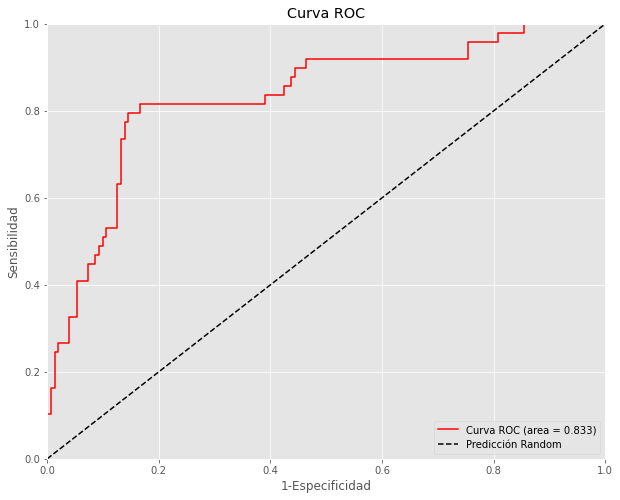

In [118]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lstm_proba_test)
roc_auc = roc_auc_score(y_test, y_pred_lstm_proba_test)

# Plot ROC curve

ax,fig=plt.subplots(figsize=(10,8))
ax=plt.plot(fpr, tpr, label='Curva ROC (area = %0.3f)' % roc_auc, color="red");
ax=plt.plot([0, 1], [0, 1], '--',color="black",label="Predicción Random") 
ax=plt.xlim([0.0, 1.0])
ax=plt.ylim([0.0, 1.0])
ax=plt.xlabel('1-Especificidad')
ax=plt.ylabel('Sensibilidad')
ax=plt.title('Curva ROC')
ax=plt.legend(loc="lower right")

## Autoencoder

Ahora corremos el modelo usando autoencoder, los cuales utilizan como base la reduccion de dimensionalidad, similar a lo que hacemos con PCA pero este se hace en una de las capas

In [119]:
X_train_enc=DataX_train.reshape((-1,ncol,1))
X_test_enc=DataX_test.reshape((-1,ncol,1))

# Creamos una semilla para tener reproducibilidad en los reusltados del modelo
import numpy as np
import tensorflow as tf
import random as python_random
import os

seed_value= 0
os.environ["PYTHONHASHSEED"] = str(seed_value)

def reset_seeds():
   np.random.seed(123) 
   python_random.seed(123)
   tf.random.set_seed(1234)

reset_seeds() 


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.regularizers import l2,l1

##
encoder_input = Input(shape=(ncol,1), name='encoder_input')
conv1=Conv1D(filters=32,kernel_size=ncol)(encoder_input) #kernel size = 100
relu_cv1=LeakyReLU()(conv1)
bn_cv1=BatchNormalization()(relu_cv1)
conv2=Conv1D(filters=64,kernel_size=1)(bn_cv1) #kernel size = 3
relu_cv2=LeakyReLU()(conv2)
bn_cv2=BatchNormalization()(relu_cv2)
conv3=Conv1D(filters=32,kernel_size=1)(bn_cv2) #kernel size = 3
relu_cv3=LeakyReLU()(conv3)
bn_cv3=BatchNormalization()(relu_cv3)
flatt_cv3=Flatten()(bn_cv3)
dense1=Dense(2)(flatt_cv3)
relu_dense=LeakyReLU()(dense1)
dense_d1=Dense(100,activation="relu")(relu_dense) # dense(100)
dropdense=Dropout(0.6)(dense_d1)
dense2=Dense(1,activation="sigmoid")(dropdense)
autoencod = Model([encoder_input], [dense2],name="autoencoder")

##fit encoder & decoder 

encoder=Model(encoder_input,relu_dense,name="encoder")
decoder_layer=autoencod.layers[-1] 
encoded_input = Input(shape=(100),name="decoder_input")

decoder= Model(encoded_input,decoder_layer(encoded_input),name="decoder")


print(autoencod.summary())
print(encoder.summary())
print(decoder.summary())

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 35, 1)]           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 32)             1152      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 32)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 32)             128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 64)             2112      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1, 64)             0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 64)             

In [120]:
cb2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10,restore_best_weights=True) #set the best weights found at scoring on validation set

autoencod.compile(
    metrics=['accuracy'],
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,decay=1e-04)  
)

history = autoencod.fit(X_train_enc, y_train, batch_size=30, epochs=50,callbacks=[cb2],validation_data=(X_test_enc,y_test))


Epoch 1/50
41/41 [==============================] - 2s 33ms/step - loss: 0.6689 - accuracy: 0.5939 - val_loss: 0.6796 - val_accuracy: 0.6400
Epoch 2/50
41/41 [==============================] - 0s 10ms/step - loss: 0.5123 - accuracy: 0.8023 - val_loss: 0.6103 - val_accuracy: 0.7550
Epoch 3/50
41/41 [==============================] - 0s 10ms/step - loss: 0.3954 - accuracy: 0.8513 - val_loss: 0.5731 - val_accuracy: 0.7500
Epoch 4/50
41/41 [==============================] - 0s 6ms/step - loss: 0.3623 - accuracy: 0.8605 - val_loss: 0.5213 - val_accuracy: 0.7500
Epoch 5/50
41/41 [==============================] - 0s 5ms/step - loss: 0.3543 - accuracy: 0.8654 - val_loss: 0.5149 - val_accuracy: 0.7550
Epoch 6/50
41/41 [==============================] - 1s 19ms/step - loss: 0.3015 - accuracy: 0.8912 - val_loss: 0.5098 - val_accuracy: 0.7650
Epoch 7/50
41/41 [==============================] - 0s 9ms/step - loss: 0.2753 - accuracy: 0.8920 - val_loss: 0.4611 - val_accuracy: 0.8000
Epoch 8/50
41/41

In [121]:
### Cómo se desempeña el modelo que usa autoencoder para realizar la predicción?
y_autoenc_test=np.where(autoencod.predict(X_test_enc)>0.5,1,0)
metrics(y_test,y_autoenc_test)

 Accuracy:0.8250 
 Precision: 0.6296 
 Recall: 0.6939 
 Kappa: 0.5427 
 F1-Score: 0.6602 
 Jaccard: 0.4928 
 logloss: 6.0444 
 Roc_score: 0.7807


Veamos como se desempeña el encoder para reducir dimensionalidad

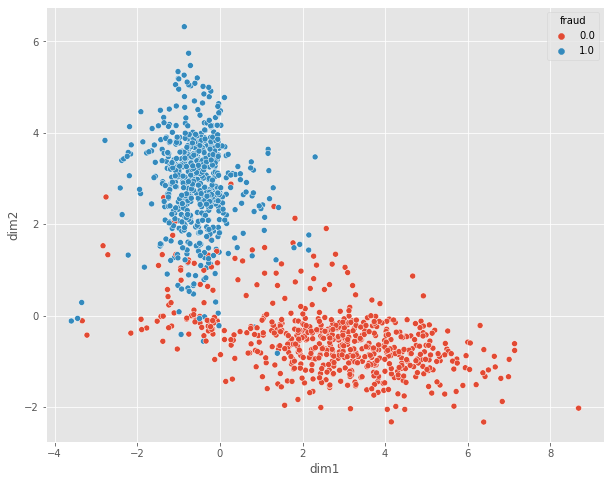

In [122]:
encod_data=pd.DataFrame(np.column_stack([encoder.predict(X_train_enc)[:,0:2],y_train]),columns=['dim1','dim2','fraud'])

ax,f=plt.subplots(figsize=(10,8))
ax=sns.scatterplot(x="dim1",y="dim2",hue="fraud",data=encod_data)

### STACKING: 
Vamos a utilizar los cuatro modelos más precisos para elaborar un modelo final que establezca la probabilidad de fraude usando toda la información disponible. Para ello elaboramos un dataset que contiene las probabilidades de cada modelo y la variable objetivo, tanto para el training como el testing set. Posteriormente construimos un clasificador SVM y uno de MLP con esta información.

In [123]:
proba_mlp.shape

(1204, 2)

In [124]:
print(prob_dt_train[:,1].shape)
print(prob_lda_train[:,1].shape)
print(prob_dt_test[:,1].shape)
print(prob_lda_test[:,1].shape)


(1204,)
(1204,)
(200,)
(200,)


In [125]:
data_stack_train=pd.DataFrame({'prob_DT':prob_dt_train[:,1], 'prob_lda': prob_lda_train[:,1],'prob_mlp': proba_mlp[:,1],'prob_svm': prob_svm_rbf_pca[:,1],'prob_lstm':y_pred_lstm_proba[:,0],'target':y_train})
data_stack_test=pd.DataFrame({'prob_DT':prob_dt_test[:,1], 'prob_lda': prob_lda_test[:,1],'prob_mlp': proba_mlp_test[:,1],'prob_svm': prob_svm_rbf_pca_test[:,1],'prob_lstm':y_pred_lstm_proba_test[:,0],'target':y_test})
data_stack_train.head()
###shuffle data
data_stack_train=data_stack_train.sample(frac=1)

In [126]:
metrica='accuracy'
steps = [("SVM_stack", SVC(kernel="rbf",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_stack__C':[0.01,0.1,1,10], 'SVM_stack__gamma':[0.05,0.01, 1, 5]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica,n_jobs=-1)
grid1.fit(data_stack_train.iloc[:,0:4], data_stack_train.iloc[:,5])
y_svm_stack=grid1.predict(data_stack_test.iloc[:,0:4])
y_svm_stack_train=grid1.predict(data_stack_train.iloc[:,0:4])
prob_svm_stack_test=grid1.predict_proba(data_stack_test.iloc[:,0:4])
metrics(data_stack_test.iloc[:,5],y_svm_stack)
#metrics(data_stack_train.iloc[:,4],y_svm_stack_train)

 Accuracy:0.8450 
 Precision: 0.7143 
 Recall: 0.6122 
 Kappa: 0.5598 
 F1-Score: 0.6593 
 Jaccard: 0.4918 
 logloss: 5.3536 
 Roc_score: 0.7664


In [127]:
##stacking usando MLP
mlp = MLPClassifier(hidden_layer_sizes=(150,150,150), max_iter=1000)
mlp.fit(data_stack_train.iloc[:,0:4], data_stack_train.iloc[:,5])

y_mlp_stack = mlp.predict(data_stack_test.iloc[:,0:4])
y_mlp_stack_train = mlp.predict(data_stack_train.iloc[:,0:4])

proba_mlp=mlp.predict_proba(data_stack_test.iloc[:,0:4])
proba_mlp_test=mlp.predict_proba(data_stack_train.iloc[:,0:4])
metrics(data_stack_test.iloc[:,5],y_mlp_stack)

 Accuracy:0.8300 
 Precision: 0.7027 
 Recall: 0.5306 
 Kappa: 0.4990 
 F1-Score: 0.6047 
 Jaccard: 0.4333 
 logloss: 5.8716 
 Roc_score: 0.7289


### Resumen Modelos Propuestos

A continuación se resumen las métricas de los modelos ajustados creando una tabla con los valores de las metricas para cada modelo

In [128]:
name_models=['Decision Tree', 'Randomd Forest', 'XGBoost', 'ADA','KNN','Regresion Ridge','LDA','QDA','SVM Lineal','SVM RBF','SVM Sigmoid',
                'SVM Lineal PCA','SVM RBF PCA','SVM Sigmoid PCA','SVM RBF LDA',
                'Elastic Net','MLP','LSTM','Stacking']

Accuracy_Train=[accuracy_score(y_train,pred_dt_train),accuracy_score(y_train,pred_rf_train),accuracy_score(y_train,pred_xgb_train), accuracy_score(y_train,pred_ada_train),accuracy_score(y_train,pred_knn_train),
                accuracy_score(y_train,pred_lass_train),accuracy_score(y_train,pred_lda_train),accuracy_score(y_train,pred_qda_train),
                accuracy_score(y_train,y_svm_lin_train),accuracy_score(y_train,y_svm_rbf_train),accuracy_score(y_train,y_svm_sig_train),
                accuracy_score(y_train,y_svm_lin_pca_train),
                accuracy_score(y_train,y_svm_rbf_pca_train),accuracy_score(y_train,y_svm_sig_pca_train),
                accuracy_score(y_train,y_svm_rbf_lda_train),accuracy_score(y_train,pred_enet_train),
                accuracy_score(y_train,y_pred_train),accuracy_score(y_train,y_pred_lstm_train),accuracy_score(data_stack_train.iloc[:,5],y_svm_stack_train)]
        
Accuracy_Test=[accuracy_score(y_test,pred_dt),accuracy_score(y_test,pred_rf),accuracy_score(y_test,pred_xgb),accuracy_score(y_test,pred_ada),accuracy_score(y_test,pred_knn),
                accuracy_score(y_test,pred_lass),accuracy_score(y_test,pred_lda),accuracy_score(y_test,pred_qda),
                accuracy_score(y_test,y_svm_lin),accuracy_score(y_test,y_svm_rbf),accuracy_score(y_test,y_svm_sig),
                accuracy_score(y_test,y_svm_lin_pca),
                accuracy_score(y_test,y_svm_rbf_pca),accuracy_score(y_test,y_svm_sig_pca),
                accuracy_score(y_test,y_svm_rbf_lda),accuracy_score(y_test,pred_enet),
                accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred_lstm),accuracy_score(data_stack_test.iloc[:,5],y_svm_stack)]

Kappa_Train=[cohen_kappa_score(y_train,pred_dt_train),cohen_kappa_score(y_train,pred_rf_train),cohen_kappa_score(y_train,pred_xgb_train),cohen_kappa_score(y_train,pred_ada_train),cohen_kappa_score(y_train,pred_knn_train),
                cohen_kappa_score(y_train,pred_lass_train),cohen_kappa_score(y_train,pred_lda_train),cohen_kappa_score(y_train,pred_qda_train),
                cohen_kappa_score(y_train,y_svm_lin_train),cohen_kappa_score(y_train,y_svm_rbf_train),cohen_kappa_score(y_train,y_svm_sig_train),
                cohen_kappa_score(y_train,y_svm_lin_pca_train),
                cohen_kappa_score(y_train,y_svm_rbf_pca_train),cohen_kappa_score(y_train,y_svm_sig_pca_train),
                cohen_kappa_score(y_train,y_svm_rbf_lda_train),cohen_kappa_score(y_train,pred_enet_train),
                cohen_kappa_score(y_train,y_pred_train),cohen_kappa_score(y_train,y_pred_lstm_train),cohen_kappa_score(data_stack_train.iloc[:,5],y_svm_stack_train)]

Kappa_Test=[cohen_kappa_score(y_test,pred_dt),cohen_kappa_score(y_test,pred_rf),cohen_kappa_score(y_test,pred_xgb),cohen_kappa_score(y_test,pred_ada),cohen_kappa_score(y_test,pred_knn),
                cohen_kappa_score(y_test,pred_lass),cohen_kappa_score(y_test,pred_lda),cohen_kappa_score(y_test,pred_qda),
                cohen_kappa_score(y_test,y_svm_lin),cohen_kappa_score(y_test,y_svm_rbf),cohen_kappa_score(y_test,y_svm_sig),
                cohen_kappa_score(y_test,y_svm_lin_pca),
                cohen_kappa_score(y_test,y_svm_rbf_pca),cohen_kappa_score(y_test,y_svm_sig_pca),
                cohen_kappa_score(y_test,y_svm_rbf_lda),cohen_kappa_score(y_test,pred_enet),
                cohen_kappa_score(y_test,y_pred),cohen_kappa_score(y_test,y_pred_lstm),cohen_kappa_score(data_stack_test.iloc[:,5],y_svm_stack)]

F1Score_Train=[f1_score(y_train,pred_dt_train),f1_score(y_train,pred_rf_train),f1_score(y_train,pred_xgb_train),f1_score(y_train,pred_ada_train),f1_score(y_train,pred_knn_train),
                f1_score(y_train,pred_lass_train),f1_score(y_train,pred_lda_train),f1_score(y_train,pred_qda_train),
                f1_score(y_train,y_svm_lin_train),f1_score(y_train,y_svm_rbf_train),f1_score(y_train,y_svm_sig_train),
                f1_score(y_train,y_svm_lin_pca_train),
                f1_score(y_train,y_svm_rbf_pca_train),f1_score(y_train,y_svm_sig_pca_train),
                f1_score(y_train,y_svm_rbf_lda_train),f1_score(y_train,pred_enet_train),
                f1_score(y_train,y_pred_train),f1_score(y_train,y_pred_lstm_train),f1_score(data_stack_train.iloc[:,5],y_svm_stack_train)]

F1Score_Test=[f1_score(y_test,pred_dt),f1_score(y_test,pred_rf),f1_score(y_test,pred_xgb),f1_score(y_test,pred_ada),f1_score(y_test,pred_knn),
                f1_score(y_test,pred_lass),f1_score(y_test,pred_lda),f1_score(y_test,pred_qda),
                f1_score(y_test,y_svm_lin),f1_score(y_test,y_svm_rbf),f1_score(y_test,y_svm_sig),
                f1_score(y_test,y_svm_lin_pca),
                f1_score(y_test,y_svm_rbf_pca),f1_score(y_test,y_svm_sig_pca),
                f1_score(y_test,y_svm_rbf_lda),f1_score(y_test,pred_enet),
                f1_score(y_test,y_pred),f1_score(y_test,y_pred_lstm),f1_score(data_stack_test.iloc[:,5],y_svm_stack)]

Recall_Train=[recall_score(y_train,pred_dt_train),recall_score(y_train,pred_rf_train),recall_score(y_train,pred_xgb_train),recall_score(y_train,pred_ada_train),recall_score(y_train,pred_knn_train),
                recall_score(y_train,pred_lass_train),recall_score(y_train,pred_lda_train),recall_score(y_train,pred_qda_train),
                recall_score(y_train,y_svm_lin_train),recall_score(y_train,y_svm_rbf_train),recall_score(y_train,y_svm_sig_train),
                recall_score(y_train,y_svm_lin_pca_train),
                recall_score(y_train,y_svm_rbf_pca_train),recall_score(y_train,y_svm_sig_pca_train),
                recall_score(y_train,y_svm_rbf_lda_train),recall_score(y_train,pred_enet_train),
                recall_score(y_train,y_pred_train),recall_score(y_train,y_pred_lstm_train),recall_score(data_stack_train.iloc[:,5],y_svm_stack_train)]

Recall_Test=[recall_score(y_test,pred_dt),recall_score(y_test,pred_rf),recall_score(y_test,pred_xgb),recall_score(y_test,pred_ada),recall_score(y_test,pred_knn),
                recall_score(y_test,pred_lass),recall_score(y_test,pred_lda),recall_score(y_test,pred_qda),
                recall_score(y_test,y_svm_lin),recall_score(y_test,y_svm_rbf),recall_score(y_test,y_svm_sig),
                recall_score(y_test,y_svm_lin_pca),
                recall_score(y_test,y_svm_rbf_pca),recall_score(y_test,y_svm_sig_pca),
                recall_score(y_test,y_svm_rbf_lda),recall_score(y_test,pred_enet),
                recall_score(y_test,y_pred),recall_score(y_test,y_pred_lstm),recall_score(data_stack_test.iloc[:,5],y_svm_stack)]

Tabla={'NombresModelos':name_models,'Accuracy Train':Accuracy_Train,'Accuracy Test':Accuracy_Test,
             'Kappa Train':Kappa_Train,'Kappa Test':Kappa_Test,
             'F1Score Train':F1Score_Train,'F1Score Test':F1Score_Test,
             'Recall Train':Recall_Train,'Recall Test':Recall_Test}
resultado_modelos = pd.DataFrame(Tabla)
resultado_modelos = resultado_modelos.round(decimals = 3)
resultado_modelos.style.highlight_max(color = 'lightblue', axis = 0)
#df.style.highlight_max(color = 'lightgreen', axis = 0)

,NombresModelos,Accuracy Train,Accuracy Test,Kappa Train,Kappa Test,F1Score Train,F1Score Test,Recall Train,Recall Test
0,Decision Tree,0.900000,0.850000,0.801000,0.639000,0.906000,0.741000,0.958000,0.878000
1,Randomd Forest,0.892000,0.820000,0.784000,0.520000,0.894000,0.640000,0.909000,0.653000
2,XGBoost,0.901000,0.850000,0.802000,0.639000,0.907000,0.741000,0.958000,0.878000
3,ADA,0.886000,0.845000,0.772000,0.620000,0.890000,0.726000,0.925000,0.837000
4,KNN,0.989000,0.760000,0.978000,0.333000,0.989000,0.489000,0.978000,0.469000
5,Regresion Ridge,0.854000,0.855000,0.708000,0.640000,0.855000,0.739000,0.862000,0.837000
6,LDA,0.853000,0.865000,0.706000,0.677000,0.854000,0.769000,0.860000,0.918000
7,QDA,0.849000,0.800000,0.698000,0.419000,0.841000,0.545000,0.797000,0.490000
8,SVM Lineal,0.850000,0.865000,0.699000,0.677000,0.851000,0.769000,0.857000,0.918000
9,SVM RBF,1.000000,0.790000,1.000000,0.342000,1.000000,0.462000,1.000000,0.367000


## Salvado del modelo final

Dados los resultados generales obtenidos con los modelos, se procede a guardar el modelo de decision tree, el cual ha mostrado el mejor desempeno en las metricas

In [129]:
steps = [('DT', DecisionTreeClassifier(random_state=4))]
pipeline = Pipeline(steps)
parametros = {'DT__max_depth': range(2,20), "DT__min_samples_split": [2, 10, 20, 30, 40, 45, 50, 100]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv = 5, scoring = scoring, n_jobs=-1, refit='kappa')
grid1.fit(DataX_train, y_train)
##correr el pipeline
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
pred_dt_train=grid1.predict(DataX_train)
pred_dt=grid1.predict(DataX_test)
prob_dt_train=grid1.predict_proba(DataX_train)
prob_dt_test=grid1.predict_proba(DataX_test)
metrics(y_test,pred_dt)

score = 0.6393
{'DT__max_depth': 4, 'DT__min_samples_split': 30}
 Accuracy:0.8500 
 Precision: 0.6418 
 Recall: 0.8776 
 Kappa: 0.6393 
 F1-Score: 0.7414 
 Jaccard: 0.5890 
 logloss: 5.1809 
 Roc_score: 0.8593


In [130]:
import joblib
filename = 'final_model.sav' # indicamos el nombre del archivo final

# Ajustamos el modelo con los hiperparametros de mejor performance
model = DecisionTreeClassifier(max_depth = 4, min_samples_split = 45, random_state=4)
# usamos el dump de joblib para crear el modelo
joblib.dump(model, filename)

['final_model.sav']

In [131]:
# load the model from disk
'''
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)
'''

'\nloaded_model = joblib.load(filename)\nresult = loaded_model.score(X_test, Y_test)\nprint(result)\n'